<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>
* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

Classify Genetic Variations using Text from Clinical Evidence

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      

</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


E:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [67]:
#here we will read the file

data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [68]:
#checking for null values
data.isnull().any()

ID           False
Gene         False
Variation    False
Class        False
dtype: bool

there are no null values in the training variants data

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [69]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

#the text data is present such as Id||Text 

print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [77]:
#finding the rows with null values for text

data_text[data_text.isnull().any(axis=1)]

,ID,TEXT
1109,1109,NaN
1277,1277,NaN
1407,1407,NaN
1639,1639,NaN
2755,2755,NaN


<h3>3.1.3. Preprocessing of text</h3>

In [59]:
#creating a set of stopwords,so that they do not repeat
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        #her \n stands for new line characters.any character excluding 'a-z' , 'A-Z' , '0-9' will be replaced by a space
        
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column].loc[index] = string
        #replacing the text with its cleaner version

In [60]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 659.9208748703954 seconds


In [71]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')#on argument tells us about the feature to be merged on 
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [72]:
result[result.isnull().any(axis=1)]
#so we need to fill up the missing values for null columns

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [73]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']
#we are filling the missing values with Text and Gene values respectively

In [74]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


In [75]:
result['Gene_Share'] = result.apply(lambda r: sum([1 for w in r['Gene'].split() if w in r['TEXT'].split()]), axis=1)
result.head()

,ID,Gene,Variation,Class,TEXT,Gene_Share
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,1
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,1
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,1
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,1
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,1


In [76]:
#occurence of variation in text
result['Variation_Share'] = result.apply(lambda r: sum([1 for w in r['Variation'].split(' ') if w in r['TEXT'].split(' ')]), axis=1)
result["Variation_Share"].value_counts()

1    1676
0    1572
2      59
3      10
5       2
4       2
Name: Variation_Share, dtype: int64

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [12]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')
#cleaning the gene and variation values for spaces and commas


X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
#here we are keeping the stratify = y_true as to get the distribution of train and test data same .i.e if for example
#there are 5 class labels in train data with class = 2 out of 30 data points,then we want the same proportion in test data
#while doing this random splitting


# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [13]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

In [1]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

b
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


NameError: name 'train_df' is not defined

<h2>3.2 Prediction using a 'Random' Model</h2>

using a random model is very important,as it serves thee pupose of baseline models and also gives us the intuition of better performance of actual models  such as reducing the loss which the random model gives

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [15]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.48241822352
Log loss on Test Data using Random Model 2.44954095
-------------------- Confusion matrix --------------------


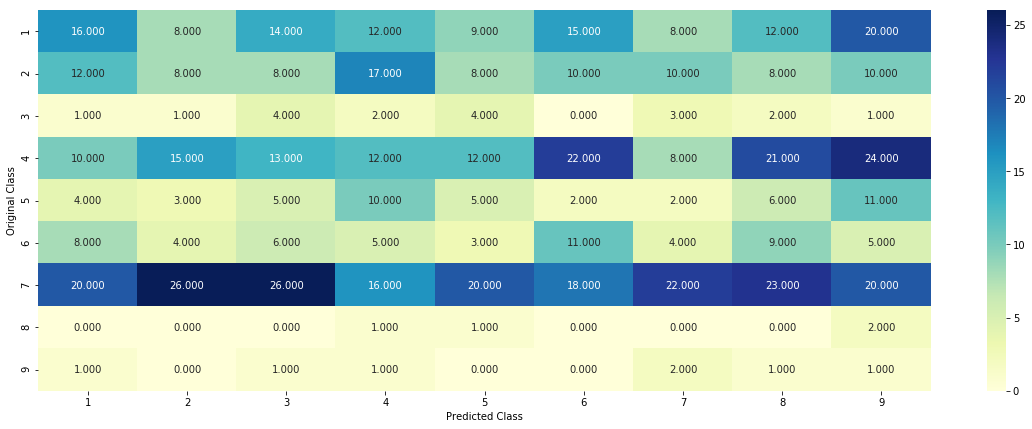

-------------------- Precision matrix (Columm Sum=1) --------------------


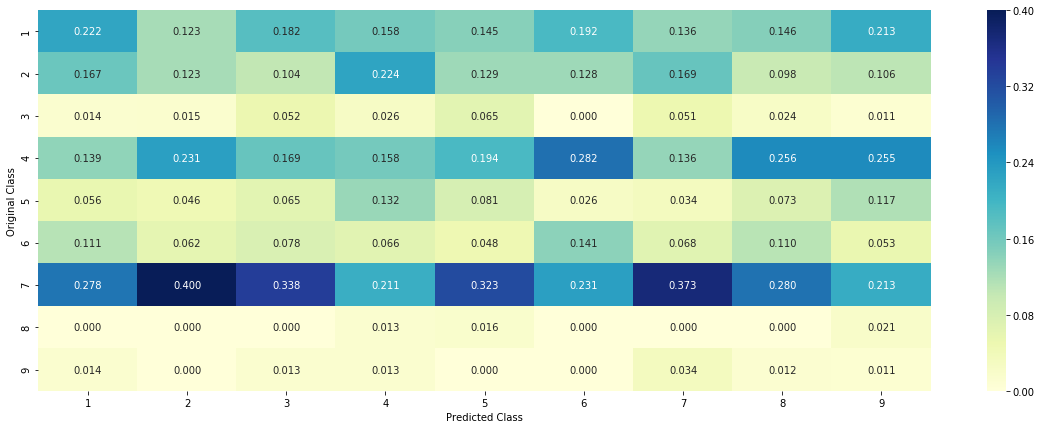

-------------------- Recall matrix (Row sum=1) --------------------


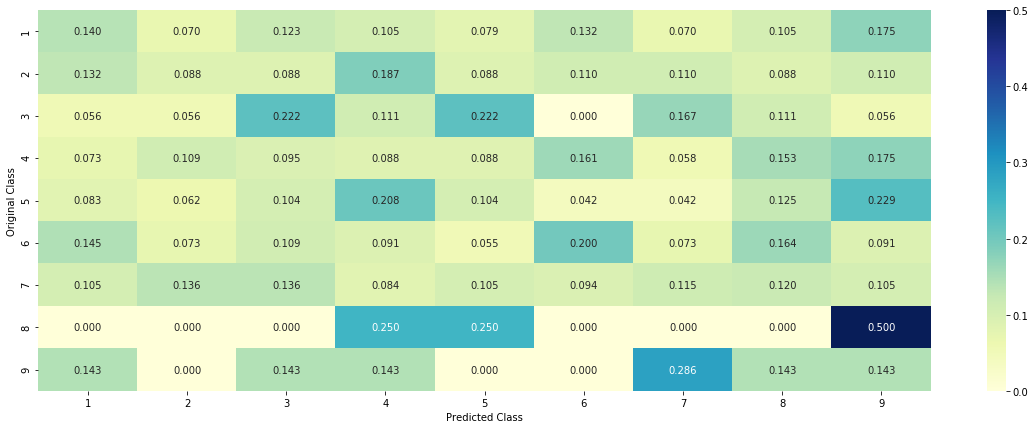

In [16]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))
#multi classs log loss takes input as the ground truth lable and probability matrix
#Log loss is undefined for p=0 or p=1, so probabilities are clipped to max(eps, min(1 - eps, p))



# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [17]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

- One very important thing we are keeping in mind here is that response coding will always be done only on training data,not on cv or test data.That is why it is checked if the feature is in training data or else we append a fixed value to it.This is being done to avoid response leakage

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha),though we are taking 10 and 90 in place of 1 and 9 respectively because the value of alpha will be chosen respectively </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [18]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])

Number of Unique Genes : 238


In [19]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 238 different categories of genes in the train data, and they are distibuted as follows


Text(0,0.5,'Counts')

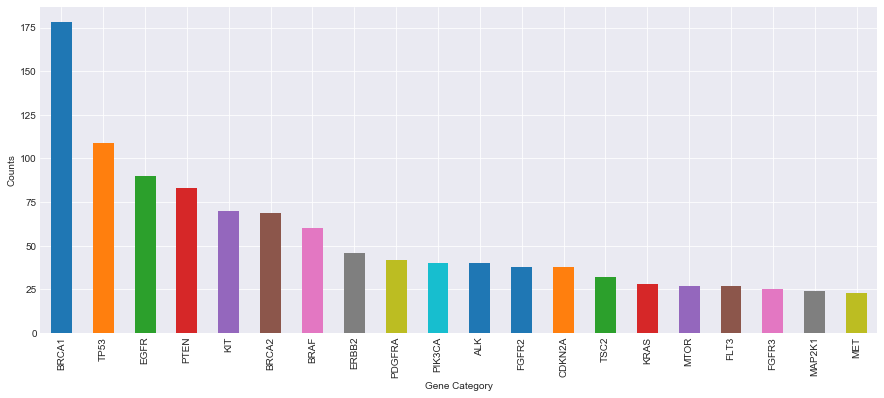

In [20]:
#top 20 gene categories by their counts
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
train_df['Gene'].value_counts().head(20).plot(kind = 'bar')
plt.xlabel('Gene Category')
plt.ylabel('Counts')


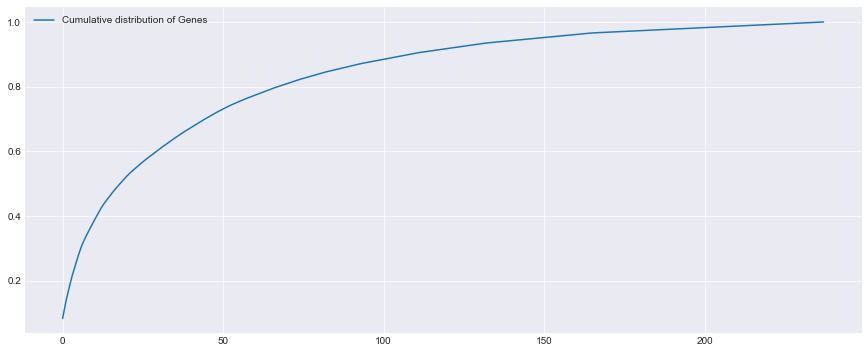

In [21]:
h = unique_genes.values/sum(unique_genes.values)
sns.set_style('darkgrid')
plt.figure(figsize = (15,6))
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
#plt.grid()
plt.legend()
plt.show()

#this curve tells us that in whole of the training data around 80 percent of data is comprised of 60 types of genes only

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

### Response Coding

In [26]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [27]:
print("train_gene_feature_responseCoding is converted feature using response coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using response coding method. The shape of gene feature: (2124, 9)


### One Hot Encoding

In [23]:
gene_vectorizer = TfidfVectorizer(ngram_range = (1,2))
#we are using Bag of words as it vectorizes the features and their values in binaries,exactly what we need for the encoding



train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [24]:
train_gene_feature_onehotCoding

<2124x237 sparse matrix of type '<class 'numpy.float64'>'
	with 2124 stored elements in Compressed Sparse Row format>

In [25]:
train_df['Gene'].head()

1813       RHOA
1832    PPP2R1A
466        TP53
2744       BRAF
2964        KIT
Name: Gene, dtype: object

In [26]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl1',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd2',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk6',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'elf3',
 'ep300',
 'epas1',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf19',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt3',
 'foxa1',
 'foxl2',
 'foxp1',
 'fubp1',
 'gata3',
 'gli1',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',

In [27]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 237)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.36578318512
For values of alpha =  0.0001 The log loss is: 1.21407996891
For values of alpha =  0.001 The log loss is: 1.25034111984
For values of alpha =  0.01 The log loss is: 1.39365298711
For values of alpha =  0.1 The log loss is: 1.51769999058
For values of alpha =  1 The log loss is: 1.56084467251


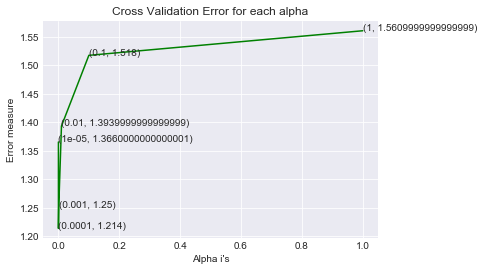

For values of best alpha =  0.0001 The train log loss is: 1.04466892004
For values of best alpha =  0.0001 The cross validation log loss is: 1.21407996891
For values of best alpha =  0.0001 The test log loss is: 1.15576253204


In [28]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.


# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)


cv_log_error_array=[]
#list for appending the log loss for every value of alpha

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    #we will be using l2 regularization
    
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))


#plt.figure(figsize=(15,6))    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
#plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [29]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  238  genes in train dataset?
Ans
1. In test data 649 out of 665 : 97.59398496240601
2. In cross validation data 517 out of  532 : 97.18045112781954


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [30]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations are :',unique_variations.shape[0])
unique_variations.head(10)

Number of Unique Variations are : 1930


Truncating_Mutations    60
Amplification           51
Deletion                49
Fusions                 15
Overexpression           4
P130S                    2
R173C                    2
I31M                     2
Q61R                     2
Y42C                     2
Name: Variation, dtype: int64

In [31]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1930 different categories of variations in the train data, and they are distibuted as follows


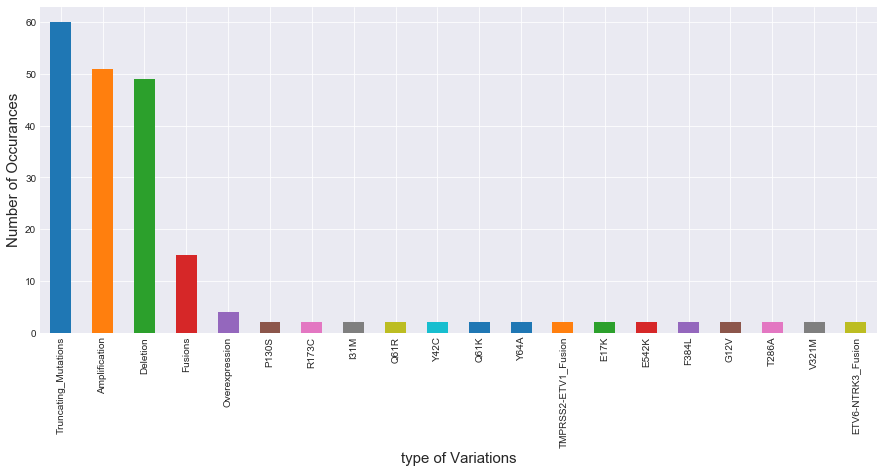

In [32]:
plt.figure(figsize=(15,6))
train_df['Variation'].value_counts().head(20).plot(kind = 'bar')
plt.xlabel('type of Variations',fontsize=15)
plt.ylabel('Number of Occurances',fontsize=15)
#plt.legend()
#plt.grid()
plt.show()

[ 0.08380414  0.13512241  0.17749529  0.2165725   0.24952919  0.28201507
  0.31026365  0.3319209   0.35169492  0.37052731  0.3893597   0.40725047
  0.42514124  0.44020716  0.45338983  0.46610169  0.47881356  0.4905838
  0.50188324  0.51271186  0.52354049  0.5334275   0.54237288  0.55084746
  0.55932203  0.56779661  0.57580038  0.58333333  0.59086629  0.59839925
  0.6059322   0.61346516  0.62052731  0.62758945  0.6346516   0.64171375
  0.64830508  0.65489642  0.66148776  0.66760829  0.67372881  0.67984934
  0.68596987  0.6920904   0.69821092  0.70386064  0.70951036  0.71516008
  0.72080979  0.7259887   0.73116761  0.73634652  0.74105461  0.74576271
  0.75        0.75423729  0.75847458  0.76271186  0.76647834  0.77024482
  0.7740113   0.77777778  0.78154426  0.78531073  0.78907721  0.79284369
  0.79661017  0.79990584  0.80320151  0.80649718  0.80979284  0.81308851
  0.81638418  0.81967985  0.82297552  0.82580038  0.82862524  0.83145009
  0.83427495  0.83709981  0.83992467  0.84274953  0.

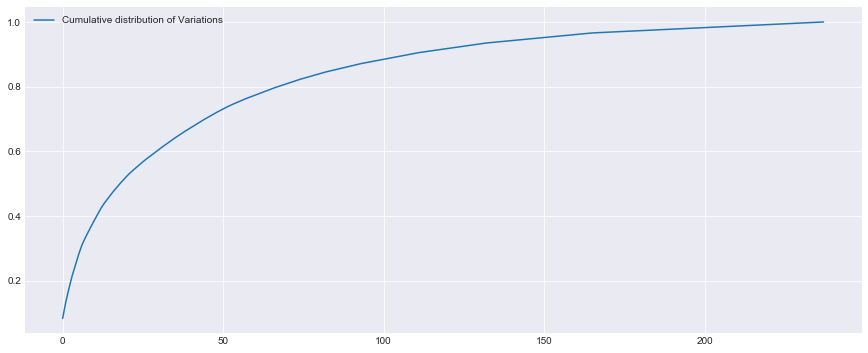

In [33]:
plt.figure(figsize=(15,6))
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
#plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [39]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [40]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [34]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer(ngram_range = (1,2))
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [35]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 2073)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.69736498373
For values of alpha =  0.0001 The log loss is: 1.6855503069
For values of alpha =  0.001 The log loss is: 1.68949917179
For values of alpha =  0.01 The log loss is: 1.70123250938
For values of alpha =  0.1 The log loss is: 1.71755511678
For values of alpha =  1 The log loss is: 1.71911958668


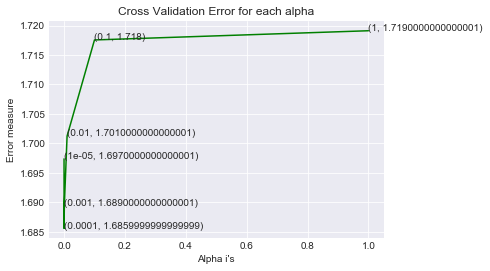

For values of best alpha =  0.0001 The train log loss is: 0.699310992114
For values of best alpha =  0.0001 The cross validation log loss is: 1.6855503069
For values of best alpha =  0.0001 The test log loss is: 1.7177667182


In [36]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
#plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [37]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1930  genes in test and cross validation data sets?
Ans
1. In test data 64 out of 665 : 9.624060150375941
2. In cross validation data 63 out of  532 : 11.842105263157894


<h1>3.2.3 Univariate Analysis on Text Feature</h1>

- Our Univaraite Analysis of text feature will be based on answering following questions regarding it

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

## HOW many unique words are present in training data

In [38]:
## we will find in the given function how many unique words are present in the trainig data and  

count_dict = defaultdict(int)
for text in train_df['TEXT'].values:
    for word in text.split():
        count_dict[word] += 1
    

In [39]:
 print('Number of unique words in the training corpus are: ',len(count_dict.keys()))

Number of unique words in the training corpus are:  126362


## Response Coding

In [40]:

def extract_dictionary_paddle(cls_text):
    """cls_text: takes argument as a dataframe
    
       dictionary: returns a dictionary for finding totla number of occurences in corpus"""
    
    dictionary = defaultdict(int)
    #this initializes the dictionary ,by setting the default integer values
    
    for index, row in cls_text.iterrows():#loop for every row
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

to do the repsonse coding on text data,we will use the folowing approach:

- Using the 'Naive' approach in Naive Bayes i.e the the datapoints are independent of one another and the P(Yi = class_label|word1,word2,word3.......) = multiplication of all probabilities of Yi given Wordi
- Take the log probabilities to ease calculations.
- in final step take exponential to get the final probabilties.

In [48]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                
            #here we are finding that a how many times a particular word occurs in a class,compared to how many times it occurs
            #in whole all the classes
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            #we are dividng the sum with length of the text as to normalize it
            
            row_index += 1
    return text_feature_responseCoding

In [49]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)



#======================================================================================


#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [50]:
print('Size of traning data after ResponseCoding: ',train_text_feature_responseCoding.shape)
print('Size of cross validation data after ResponseCoding: ',cv_text_feature_responseCoding.shape)
print('Size of test data after ResponseCoding: ',test_text_feature_responseCoding.shape)

Size of traning data after ResponseCoding:  (2124, 9)
Size of cross validation data after ResponseCoding:  (532, 9)
Size of test data after ResponseCoding:  (665, 9)


# Using tfidf vectorizer for One hot encoding

In [41]:
text_vectorizer = TfidfVectorizer(ngram_range = (1,2),min_df = 10,max_features = 5000)
#we will be considering only top 2000 features

train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
#vectorizer will learn from training data on building the vocabulary

# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

In [42]:
print('Number of features after vectorizing using fourrigrams are:',len(train_text_features))

freq = text_vectorizer.idf_
text_fea_dict = dict(zip(list(train_text_features),freq))#dictionary for features as key and their idf as values

#calculating the idf scores 
indices = np.argsort(-freq)#sorts the indices of freq in descending values 

fea_dict = defaultdict(int)
for i in indices:
    fea_dict[train_text_features[i]] = freq[i]
    
    
df = pd.DataFrame.from_dict(fea_dict,orient = 'index',columns = ['Frequencies'])
print('TOP 20 features with maximum with maximum frequency value are:')
(df.head(20))


Number of features after vectorizing using fourrigrams are: 5000
TOP 20 features with maximum with maximum frequency value are:


,Frequencies
d171n,6.263632
ovca,6.263632
fat1,6.263632
fedratinib,6.263632
pipkii,6.176620
cul3 spop,6.176620
bcl10,6.176620
elf3,6.176620
ddr2,6.096578
ikk2,6.096578


In [43]:
#normalizing the frquencies
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

#one hot encoding cross validation data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

#one hot encoding test data 
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

In [44]:
print('after vectorization :')
print('Shape of test data is',test_text_feature_onehotCoding.shape)
print('Shape of cross validation data is',cv_text_feature_onehotCoding.shape)

after vectorization :
Shape of test data is (665, 5000)
Shape of cross validation data is (532, 5000)


## How word frequencies are distributed


In [53]:
vect = CountVectorizer(min_df = 3)
train_vec_occur = vect.fit_transform(train_df['TEXT'])
features = vect.get_feature_names()


dict_occurences = dict(zip(features,train_vec_occur.sum(axis = 0).A1))
#sum(axis=0).A1 will sum every column and returns (1*number of features) vector

In [54]:
sorted_dict = dict(sorted(dict_occurences.items(),key = lambda x:x[1],reverse = True))
#key here maps a function and sorts accoridng to that
total_occurences = Counter(sorted_dict.values())

#Counter prints the number of words as keys and their occurences as values
print(total_occurences)

Counter({3: 5344, 4: 3540, 5: 3064, 6: 2793, 7: 2011, 9: 1821, 8: 1771, 11: 1449, 10: 1419, 12: 1277, 15: 1027, 13: 947, 14: 862, 18: 791, 16: 682, 17: 580, 20: 540, 22: 526, 24: 514, 21: 503, 19: 493, 27: 401, 25: 393, 30: 371, 44: 365, 28: 354, 38: 353, 23: 351, 26: 347, 33: 334, 29: 291, 36: 283, 32: 261, 35: 260, 34: 252, 31: 246, 40: 235, 42: 211, 39: 203, 37: 201, 54: 199, 45: 191, 48: 185, 50: 173, 41: 171, 47: 163, 43: 156, 60: 151, 57: 151, 49: 147, 51: 145, 66: 139, 55: 138, 56: 132, 88: 131, 46: 130, 52: 129, 53: 117, 61: 115, 72: 113, 67: 113, 63: 106, 70: 105, 68: 105, 64: 104, 58: 103, 65: 102, 59: 102, 62: 91, 69: 89, 73: 88, 77: 87, 71: 84, 78: 83, 76: 83, 80: 82, 79: 81, 84: 79, 81: 77, 82: 72, 74: 72, 98: 71, 93: 71, 90: 71, 85: 66, 108: 63, 107: 61, 83: 61, 75: 61, 92: 60, 132: 59, 89: 59, 96: 58, 87: 58, 110: 56, 100: 56, 86: 56, 105: 55, 102: 55, 97: 55, 91: 53, 101: 50, 116: 49, 99: 49, 95: 48, 112: 47, 109: 47, 104: 47, 120: 46, 115: 46, 94: 46, 144: 45, 135: 45,

## Modelling for text using logistic regression

For values of alpha =  1e-05 The log loss is: 1.21622079264
For values of alpha =  0.0001 The log loss is: 1.18267266062
For values of alpha =  0.001 The log loss is: 1.28425601325
For values of alpha =  0.01 The log loss is: 1.56060210893
For values of alpha =  0.1 The log loss is: 1.83817632392
For values of alpha =  1 The log loss is: 1.89862927585


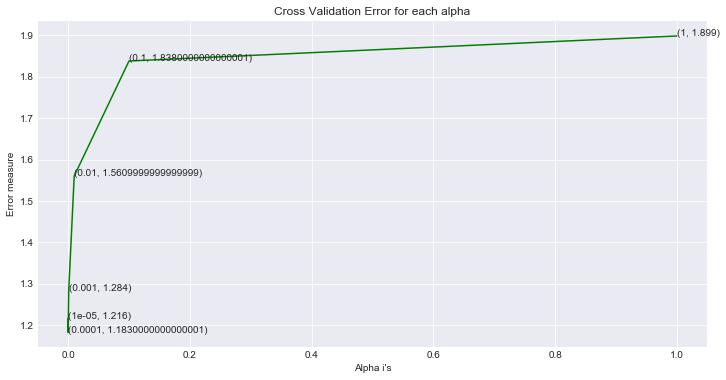

For values of best alpha =  0.0001 The train log loss is: 0.690544724976
For values of best alpha =  0.0001 The cross validation log loss is: 1.18267266062
For values of best alpha =  0.0001 The test log loss is: 1.01820603153


In [45]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots(figsize=(12, 6))
#plt.figure(figsize=(10,6))
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
#plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## Stability of text feature

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [56]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df = 3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(features) & set(df_text_features))
    return len1,len2

In [57]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.754 % of word of test data appeared in train data
98.04 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [58]:
"""FUNCTION for plotting the confusion matix"""

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)
    
    
#=======================================================================================================================


"""FUNCTION for calculating the logg loss on train and test data"""

def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    
    """takes input:
                train_x: training data
                train_y: training target variable
                test_x: test data
                test_y: test target variable
                clf: classifier fitted with tuned hyperparameters
                
        returns:
                log_loss: returns the log loss computed on test data          """
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)


#==========================================================================================================================

"""FUNCTION for finding the feature importances in Naive Bayes"""


# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    
    """takes input:
            indices: inddex of the query point in test data
            text: text of the query point
            gene: what category gene does the query point belongs to
            var:  variation categoty of the query point
            no_feature: number of top features to be checked for the query point
            
            
        returns:
            prints the rank of feature if it exists and the feature itself"""
    
    #initiating the vectorizer for each of them
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = TfidfVectorizer(ngram_range = (1,3),min_df = 3,stop_words = 'english',max_features = 10000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            if word == gene:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point True".format(word))
                
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            if word == var:
                word_present += 1
                print(i, "variation feature [{}] present in test data point True".format(word))
                
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            if word in text.split():
                word_present += 1
                print(i, "Text feature [{}] present in test data point True".format(word))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")


<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [47]:
#now we will prepare the final dataset fo training,cross validation and test
#we will horizontally stack all the datapoints to get our desired dataset

"""TRAINING DATA"""

#preparing the dataset with features using one hot encoding
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()

#preparing the dataset with features using response coding
#train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
#train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))

#target variable
train_y = np.array(list(train_df['Class']))


#==================================================================

"""CROSS VALIDATION DATA"""


#preparing the datset with features using one hot encoding
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))
cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()


#preparing dataset with features using responsecoding
#cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))
#cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


#target variable
cv_y = np.array(list(cv_df['Class']))

#=======================================================================

"""TEST DATASET"""

#dataset with one hot encoding features
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()

#dataset with responsecoding features
#test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
#test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))

#target variable
test_y = np.array(list(test_df['Class']))

In [49]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 7310)
(number of data points * number of features) in test data =  (665, 7310)
(number of data points * number of features) in cross validation data = (532, 7310)


In [62]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

In [50]:
def plot_error(alpha_values,loss_array):
    
    "plots the error vs hyperparmeter plot"
    
    
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize = (18,5))
    ax.plot(alpha_values, loss_array,c='g')
    for i, txt in enumerate(np.round(loss_array,3)):
        ax.annotate((alpha_values[i],str(txt)), (alpha_values[i],loss_array[i]))
    #plt.grid()
    plt.xticks(alpha_values)
    plt.title("Cross Validation Error for each value of hyperparameter",fontsize=15)
    plt.xlabel("hyperparameter",fontsize=15)
    plt.ylabel("Error measure",fontsize=15)
    plt.show()
    

In [51]:
def pred_onehotCoding(sig_clf,best_param):
    predict_y = sig_clf.predict_proba(train_x_onehotCoding)
    print('For values of best alpha = ', best_param, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
    predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
    print('For values of best alpha = ', best_param, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    predict_y = sig_clf.predict_proba(test_x_onehotCoding)
    print('For values of best alpha = ', best_param, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h2>4.1.1. Naive Bayes</h2>

<h3>4.1.1.1. Hyper parameter tuning</h3>

for alpha : 0.0001 Log Loss : 1.18383045218
for alpha : 0.001 Log Loss : 1.18076728042
for alpha : 0.01 Log Loss : 1.19129746161
for alpha : 0.1 Log Loss : 1.21591911222
for alpha : 1 Log Loss : 1.24544848828
for alpha : 10 Log Loss : 1.32443863682
for alpha : 100 Log Loss : 1.3040982658
for alpha : 1000 Log Loss : 1.27986807242
for alpha : 10000 Log Loss : 1.27805503229


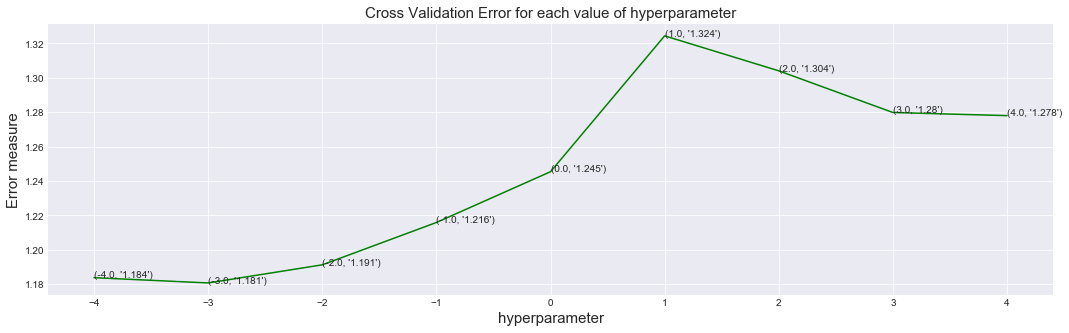

In [65]:
#using the multinomial naive bayes 


alpha = [10**i for i in range(-4,5)]
cv_log_error_array = []
for i in alpha:
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("for alpha :",i , "Log Loss :",log_loss(cv_y, sig_clf_probs)) 



plot_error(np.log10(alpha),cv_log_error_array)

In [66]:
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

pred_onehotCoding(sig_clf,best_alpha)

For values of best alpha =  1 The train log loss is: 0.823539963485
For values of best alpha =  1 The cross validation log loss is: 1.18076728042
For values of best alpha =  1 The test log loss is: 1.29685473658


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.18076728042
percentage of missclassified point : 36.09022556390977
-------------------- Confusion matrix --------------------


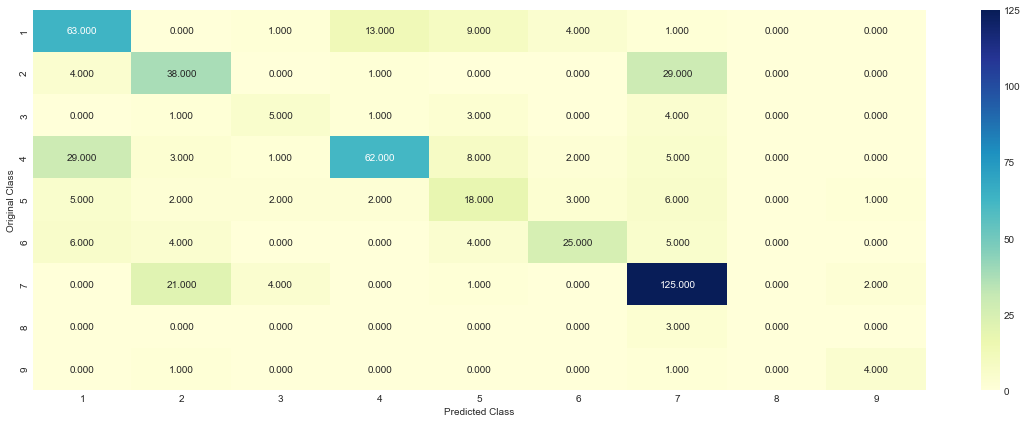

-------------------- Precision matrix (Columm Sum=1) --------------------


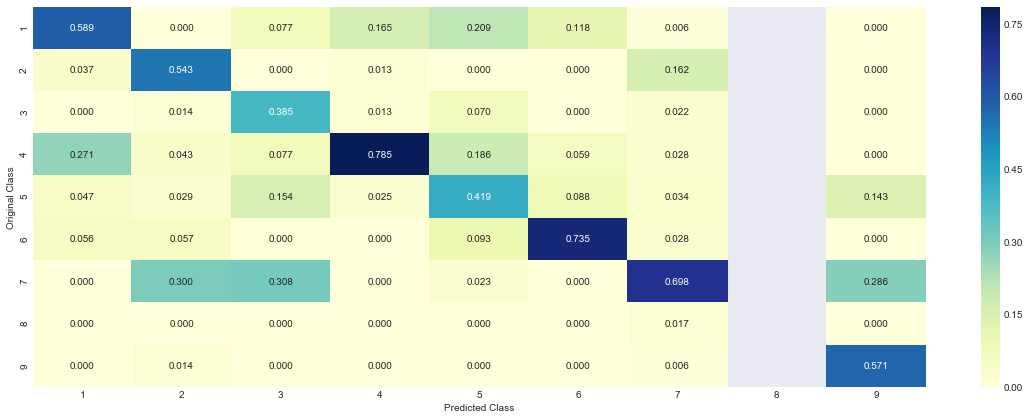

-------------------- Recall matrix (Row sum=1) --------------------


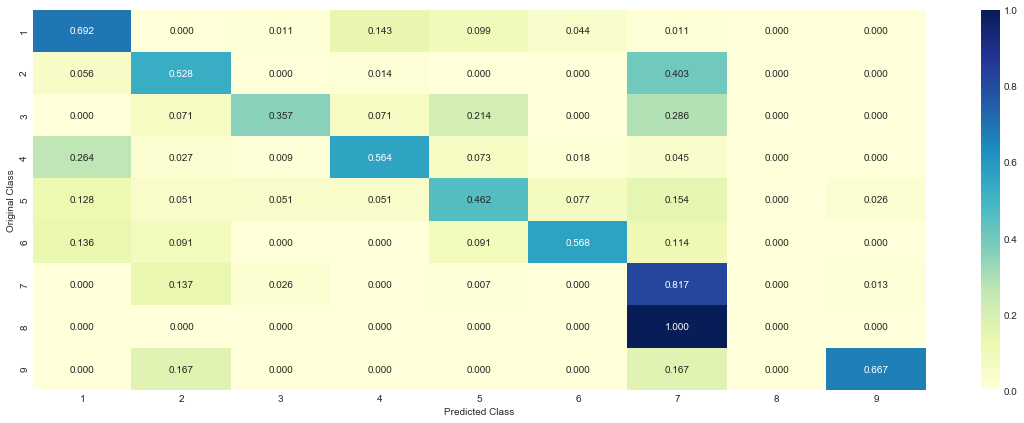

In [67]:
"""FUNCTION FOR BEST CLASSIFIER"""

def best_classifier(clf):
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    pred = sig_clf.predict(cv_x_onehotCoding)
        # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs))
    print("percentage of missclassified point :", (np.count_nonzero((pred - cv_y))/cv_y.shape[0])*100)
    plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))
    
    

clf = MultinomialNB(alpha=alpha[best_alpha])
best_classifier(clf)


<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [68]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])



Predicted Class : 5
Predicted Class Probabilities: [[ 0.0949  0.0823  0.0167  0.1163  0.5093  0.0493  0.1218  0.0057  0.0037]]
Actual Class : 5


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [69]:
test_point_index = 100
no_feature = 1000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])

Predicted Class : 4
Predicted Class Probabilities: [[ 0.1726  0.0625  0.0126  0.5716  0.042   0.0381  0.0934  0.0042  0.0031]]
Actual Class : 4


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0722555117
for alpha = 11
Log Loss : 1.02928395414
for alpha = 15
Log Loss : 1.03089195868
for alpha = 21
Log Loss : 1.0319632214
for alpha = 31
Log Loss : 1.04494174038
for alpha = 41
Log Loss : 1.05137221458
for alpha = 51
Log Loss : 1.05939947971
for alpha = 99
Log Loss : 1.08818829229


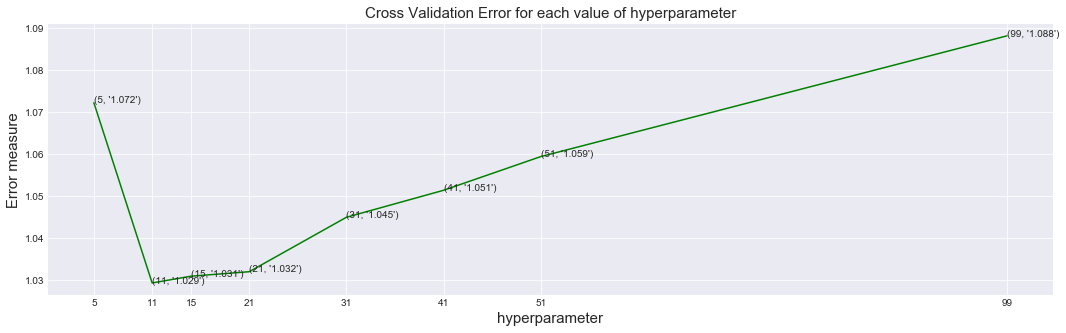

In [70]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

plot_error(alpha,cv_log_error_array)



In [71]:
def pred_response(sig_clf,param):
    predict_y = sig_clf.predict_proba(train_x_responseCoding)
    print('For values of best alpha = ', param, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
    predict_y = sig_clf.predict_proba(cv_x_responseCoding)
    print('For values of best alpha = ', param, "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    predict_y = sig_clf.predict_proba(test_x_responseCoding)
    print('For values of best alpha = ', param, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    

In [72]:
best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

pred_response(sig_clf,best_alpha)

For values of best alpha =  1 The train log loss is: 0.648670073687
For values of best alpha =  1 The cross validation log loss is: 1.02928395414
For values of best alpha =  1 The test log loss is: 1.06567357463


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.02928395414
Number of mis-classified points : 0.37218045112781956
-------------------- Confusion matrix --------------------


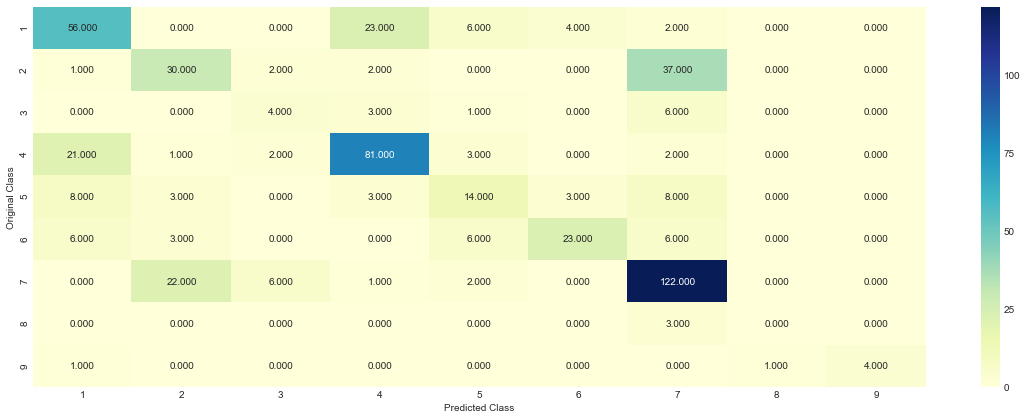

-------------------- Precision matrix (Columm Sum=1) --------------------


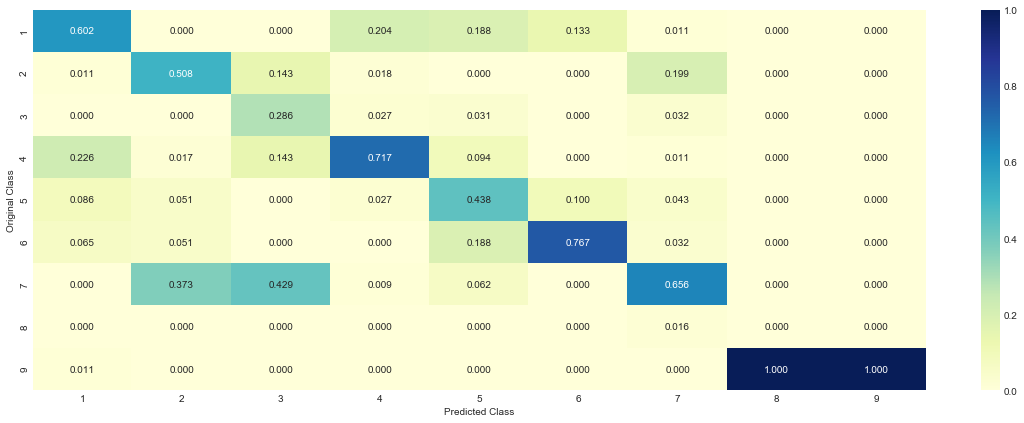

-------------------- Recall matrix (Row sum=1) --------------------


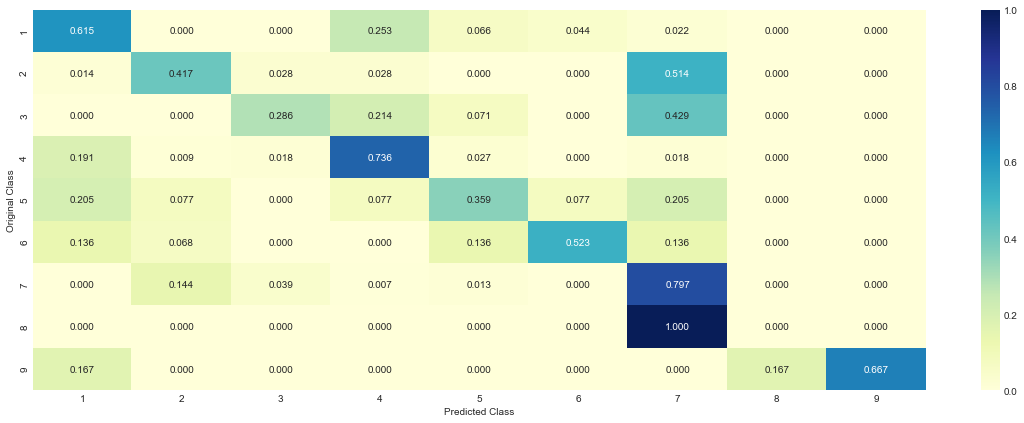

In [73]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [74]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 5
The  11  nearest neighbours of the test points belongs to classes [1 5 5 5 5 5 5 5 5 5 5]
Fequency of nearest points : Counter({5: 10, 1: 1})


<h3>4.2.4. Sample Query Point-2 </h3>

In [75]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 4
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [4 4 4 4 4 4 4 4 1 4 4]
Fequency of nearest points : Counter({4: 10, 1: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha: 1e-06 Log Loss : 1.09534484943
for alpha: 1e-05 Log Loss : 1.10155615609
for alpha: 0.0001 Log Loss : 1.06408422134
for alpha: 0.001 Log Loss : 1.06078691671
for alpha: 0.01 Log Loss : 1.19708539981
for alpha: 0.1 Log Loss : 1.68123634544
for alpha: 1 Log Loss : 1.7898378882
for alpha: 10 Log Loss : 1.7980305075
for alpha: 100 Log Loss : 1.79894563271


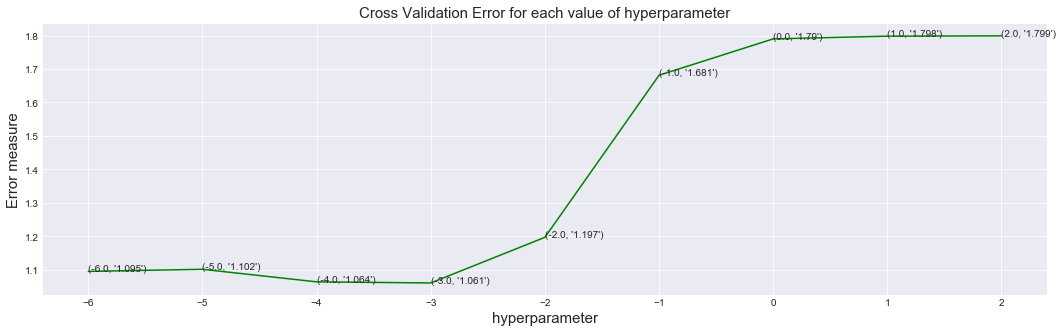

In [52]:

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("for alpha:",i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 
    
plot_error(np.log10(alpha),cv_log_error_array)


In [53]:
best_alpha = alpha[np.argmin(cv_log_error_array)]
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

pred_onehotCoding(sig_clf,best_alpha)

For values of best alpha =  0.001 The train log loss is: 0.606458196683
For values of best alpha =  0.001 The cross validation log loss is: 1.06078691671
For values of best alpha =  0.001 The test log loss is: 0.968103247953


<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.01900117067
Number of mis-classified points : 0.32142857142857145
-------------------- Confusion matrix --------------------


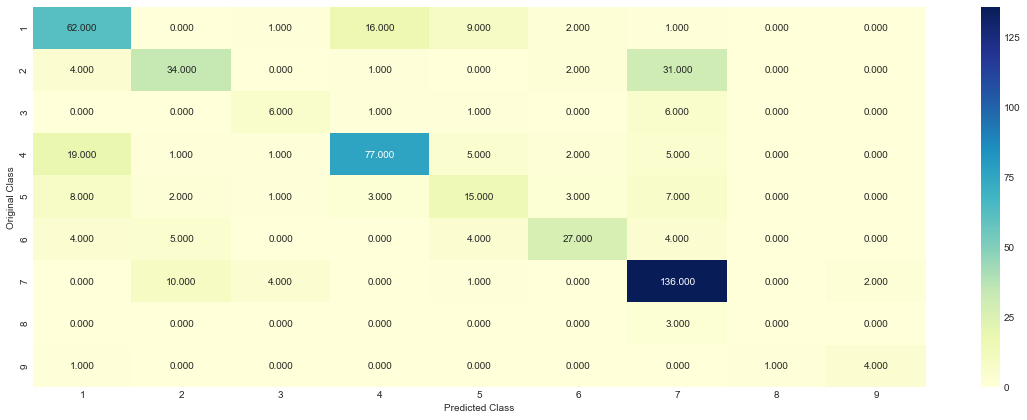

-------------------- Precision matrix (Columm Sum=1) --------------------


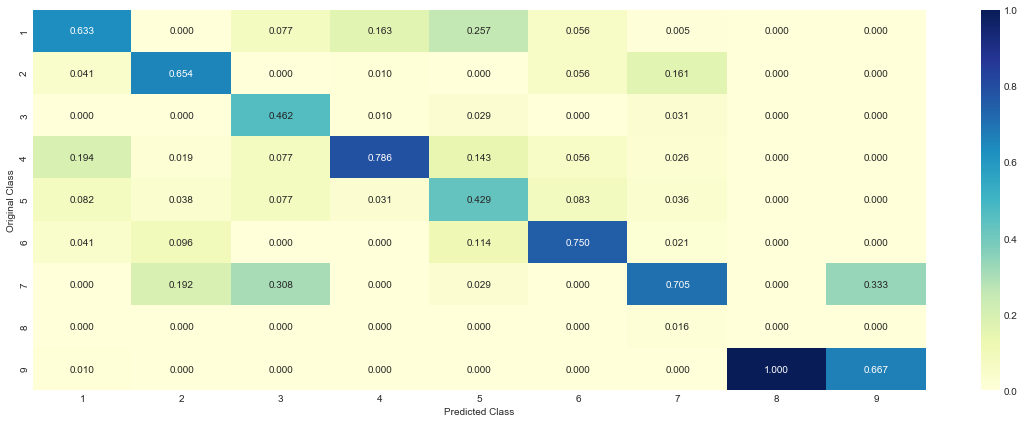

-------------------- Recall matrix (Row sum=1) --------------------


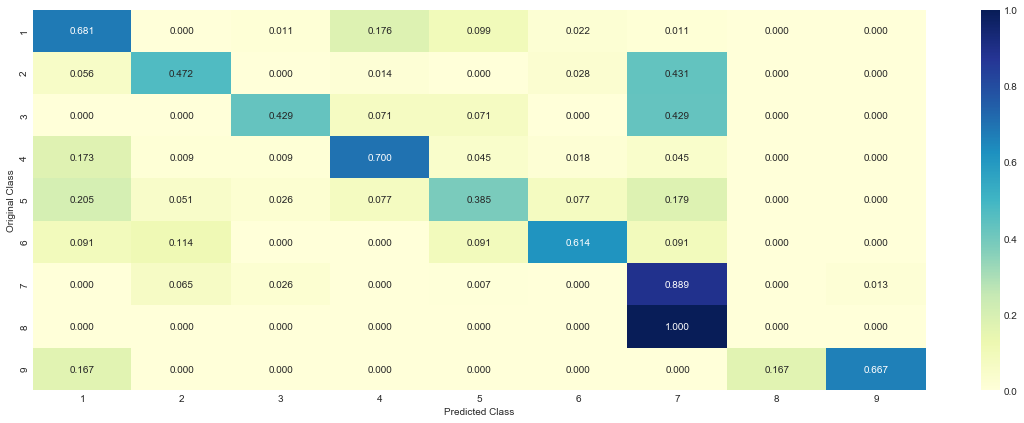

In [78]:
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [80]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [81]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 4
Predicted Class Probabilities: [[ 0.2005  0.0114  0.0038  0.726   0.0115  0.0081  0.0341  0.0034  0.0012]]
Actual Class : 4


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [82]:

test_point_index = 2
no_feature = 5000
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 7
Predicted Class Probabilities: [[  1.31000000e-02   2.55400000e-01   8.00000000e-04   2.20000000e-03
    2.25100000e-01   2.80000000e-03   5.00100000e-01   4.00000000e-04
    1.00000000e-04]]
Actual Class : 5


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha: 1e-06 Log Loss : 1.13069789854
for alpha: 1e-05 Log Loss : 1.13676627302
for alpha: 0.0001 Log Loss : 1.08344146393
for alpha: 0.001 Log Loss : 1.05891447055
for alpha: 0.01 Log Loss : 1.23537014233
for alpha: 0.1 Log Loss : 1.43439362734
for alpha: 1 Log Loss : 1.67277608821


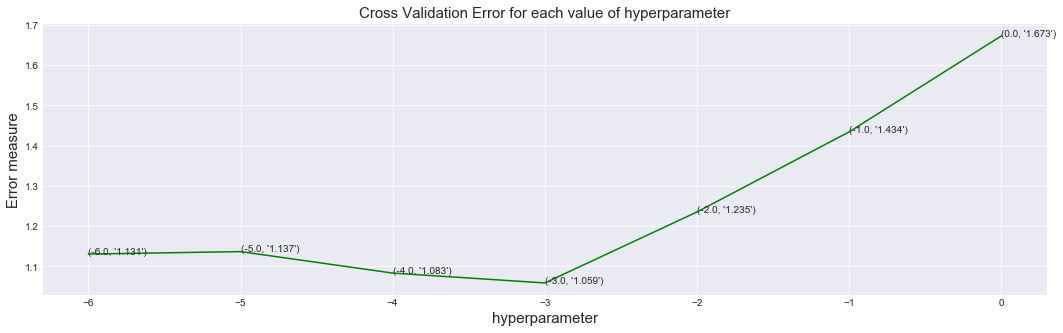

In [83]:

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print('for alpha:',i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 

plot_error(np.log10(alpha),cv_log_error_array)


In [84]:
best_alpha = alpha[np.argmin(cv_log_error_array)]
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

pred_onehotCoding(sig_clf,best_alpha)

For values of best alpha =  0.001 The train log loss is: 0.567030746482
For values of best alpha =  0.001 The cross validation log loss is: 1.05891447055
For values of best alpha =  0.001 The test log loss is: 1.03132829493


<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.05891447055
Number of mis-classified points : 0.33270676691729323
-------------------- Confusion matrix --------------------


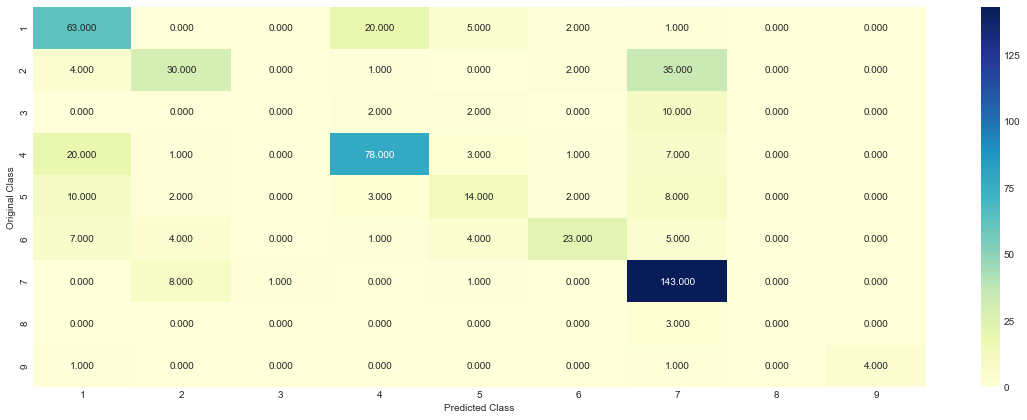

-------------------- Precision matrix (Columm Sum=1) --------------------


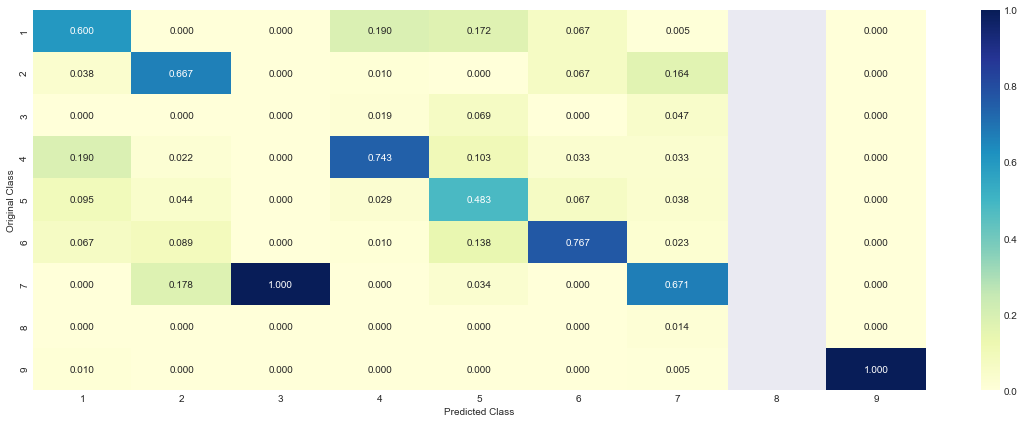

-------------------- Recall matrix (Row sum=1) --------------------


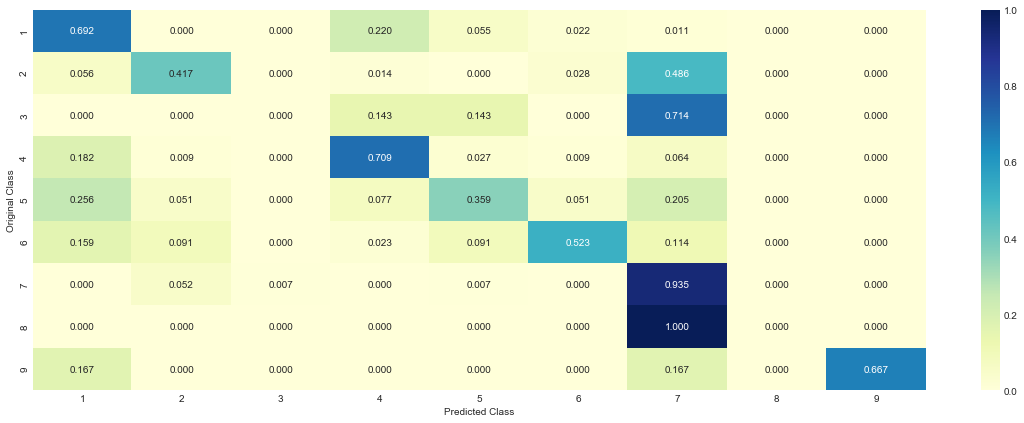

In [85]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [86]:
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 5
Predicted Class Probabilities: [[  2.69000000e-02   8.00000000e-04   1.84000000e-02   1.92400000e-01
    7.31100000e-01   2.76000000e-02   4.00000000e-04   2.20000000e-03
    0.00000000e+00]]
Actual Class : 5


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [87]:
test_point_index = 108
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 4
Predicted Class Probabilities: [[ 0.1015  0.017   0.0116  0.737   0.033   0.0132  0.0813  0.0046  0.0009]]
Actual Class : 1


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for alpha: 1e-05 Log Loss : 1.18981702982
for alpha: 0.0001 Log Loss : 1.11069108031
for alpha: 0.001 Log Loss : 1.03944471572
for alpha: 0.01 Log Loss : 1.13129526114
for alpha: 0.1 Log Loss : 1.67656018045
for alpha: 1 Log Loss : 1.75096523791
for alpha: 10 Log Loss : 1.75096021069
for alpha: 100 Log Loss : 1.75096023415


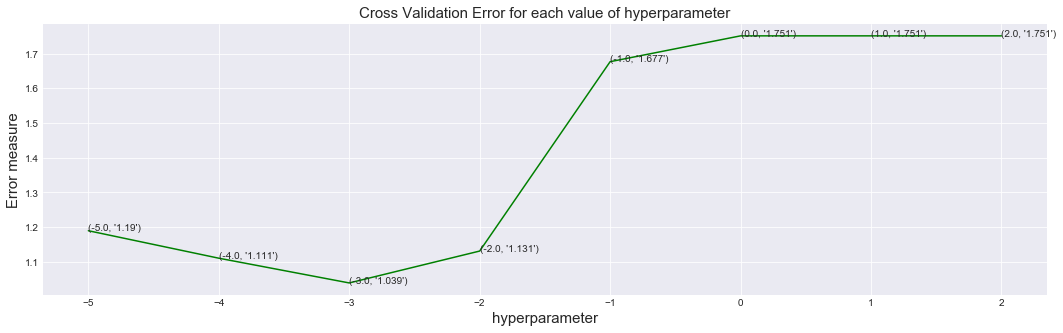

In [88]:


alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("for alpha:",i,"Log Loss :",log_loss(cv_y, sig_clf_probs)) 

plot_error(np.log10(alpha),cv_log_error_array)

In [89]:
best_alpha = alpha[np.argmin(cv_log_error_array)]
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

pred_onehotCoding(sig_clf,best_alpha)

For values of best alpha =  0.001 The train log loss is: 0.560720959861
For values of best alpha =  0.001 The cross validation log loss is: 1.03944471572
For values of best alpha =  0.001 The test log loss is: 1.00200554344


<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.03944471572
Number of mis-classified points : 0.3233082706766917
-------------------- Confusion matrix --------------------


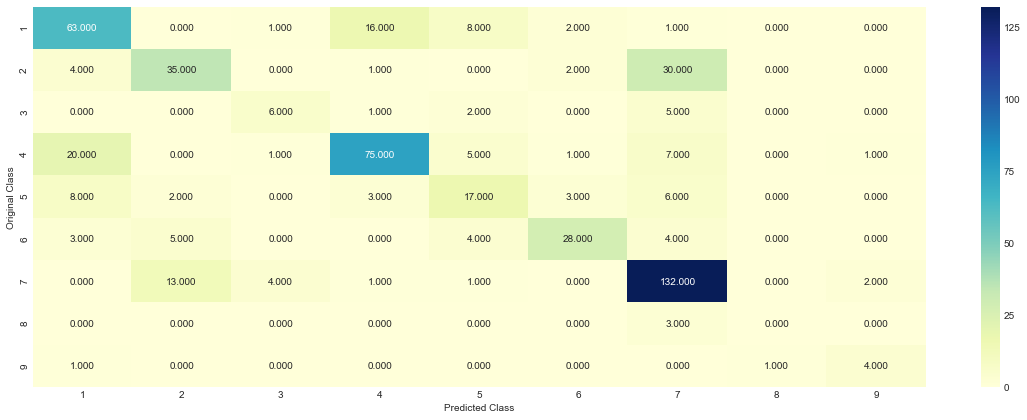

-------------------- Precision matrix (Columm Sum=1) --------------------


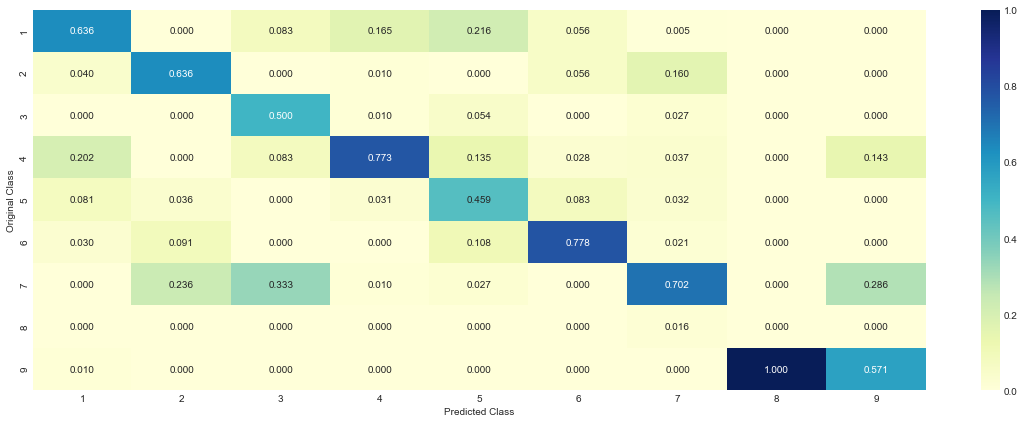

-------------------- Recall matrix (Row sum=1) --------------------


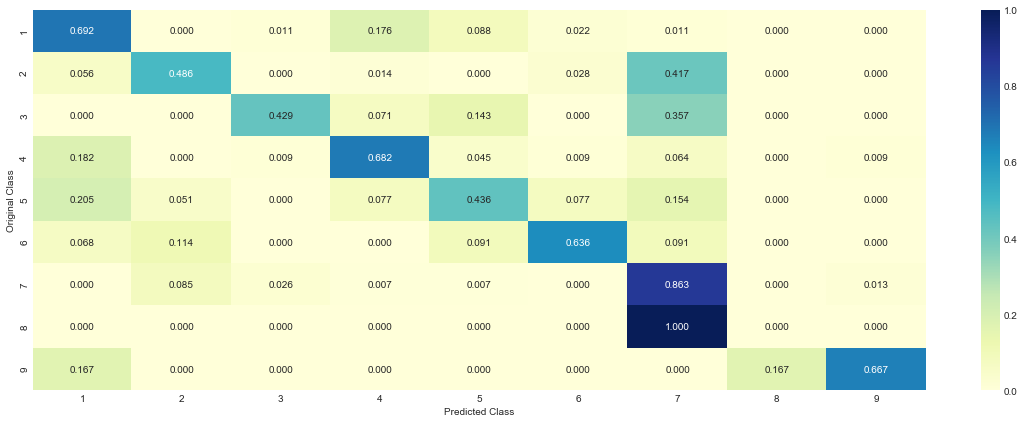

In [90]:


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [91]:

test_point_index = 190
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 9
Predicted Class Probabilities: [[ 0.0205  0.0142  0.0028  0.0508  0.0162  0.0056  0.0777  0.0012  0.8111]]
Actual Class : 9


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [92]:
test_point_index = 230
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 4
Predicted Class Probabilities: [[ 0.1229  0.0361  0.0139  0.701   0.0322  0.0093  0.0781  0.0048  0.0017]]
Actual Class : 4


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [93]:


alpha = [100,200,500,1000,2000]
max_depth = [5,10,15]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 


for n_estimators = 100 and max depth =  5
Log Loss : 1.20441328455
for n_estimators = 100 and max depth =  10
Log Loss : 1.14914326092
for n_estimators = 100 and max depth =  15
Log Loss : 1.15568155276
for n_estimators = 200 and max depth =  5
Log Loss : 1.19909167579
for n_estimators = 200 and max depth =  10
Log Loss : 1.13954503498
for n_estimators = 200 and max depth =  15
Log Loss : 1.15583188515
for n_estimators = 500 and max depth =  5
Log Loss : 1.19303825517
for n_estimators = 500 and max depth =  10
Log Loss : 1.13589482818
for n_estimators = 500 and max depth =  15
Log Loss : 1.15529873976
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1928881513
for n_estimators = 1000 and max depth =  10
Log Loss : 1.13783554005
for n_estimators = 1000 and max depth =  15
Log Loss : 1.15516782521
for n_estimators = 2000 and max depth =  5
Log Loss : 1.19344223059
for n_estimators = 2000 and max depth =  10
Log Loss : 1.13923688055
for n_estimators = 2000 and max depth =  15
Log L

In [94]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/3)], criterion='gini', max_depth=max_depth[int(best_alpha%3)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/3)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/3)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/3)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  500 The train log loss is: 0.598298932799
For values of best estimator =  500 The cross validation log loss is: 1.13589482818
For values of best estimator =  500 The test log loss is: 1.11047273946


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.13589482818
Number of mis-classified points : 0.36654135338345867
-------------------- Confusion matrix --------------------


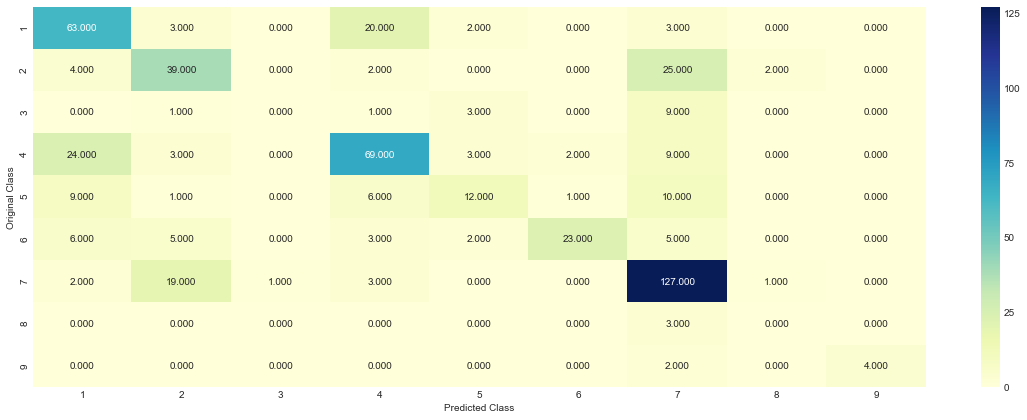

-------------------- Precision matrix (Columm Sum=1) --------------------


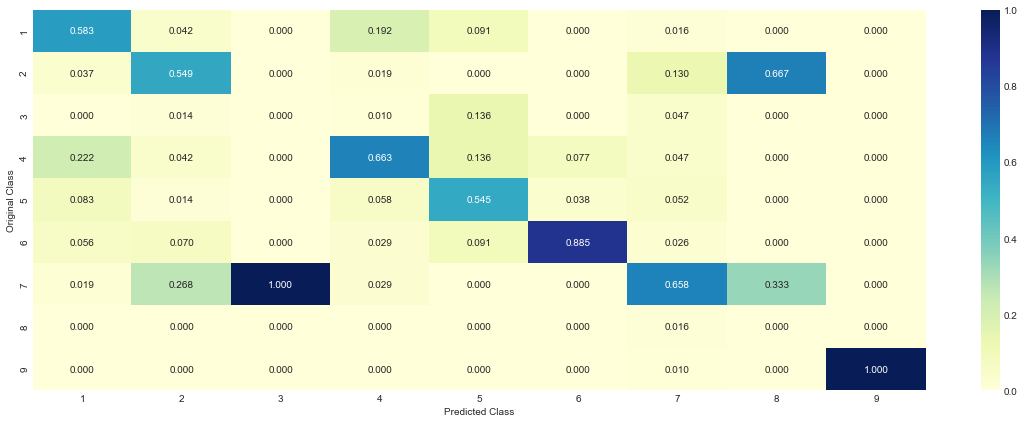

-------------------- Recall matrix (Row sum=1) --------------------


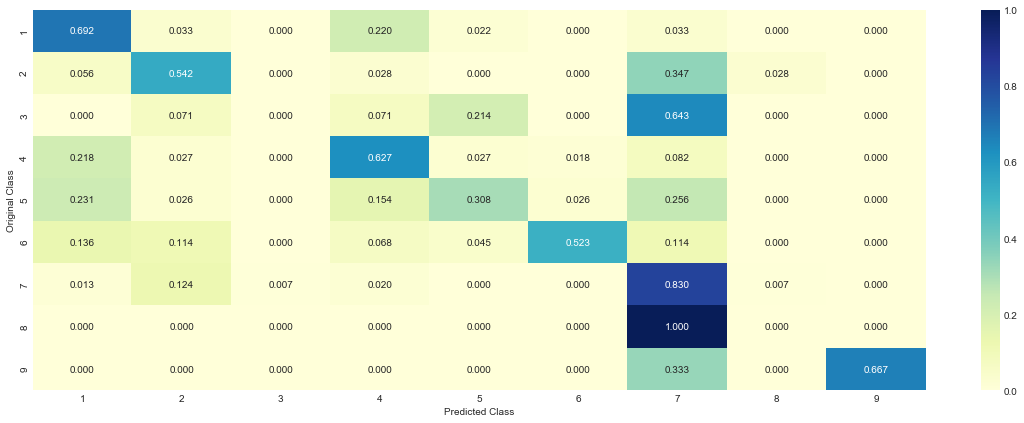

In [95]:


clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/3)], criterion='gini', max_depth=max_depth[int(best_alpha%3)], random_state=42, n_jobs=-1)

#as each aplha will be repeated 3 times for 

predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [96]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 5
Predicted Class Probabilities: [[ 0.0577  0.0212  0.0305  0.0575  0.7234  0.0758  0.0285  0.0019  0.0034]]
Actual Class : 5


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [97]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])

Predicted Class : 4
Predicted Class Probabilities: [[ 0.1795  0.0585  0.0189  0.5166  0.0448  0.0401  0.128   0.0054  0.0082]]
Actuall Class : 4


<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [98]:


alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 


for n_estimators = 10 and max depth =  2
Log Loss : 2.07846058319
for n_estimators = 10 and max depth =  3
Log Loss : 1.69113688328
for n_estimators = 10 and max depth =  5
Log Loss : 1.41307008628
for n_estimators = 10 and max depth =  10
Log Loss : 1.86741945739
for n_estimators = 50 and max depth =  2
Log Loss : 1.74148611567
for n_estimators = 50 and max depth =  3
Log Loss : 1.4663303266
for n_estimators = 50 and max depth =  5
Log Loss : 1.40036304627
for n_estimators = 50 and max depth =  10
Log Loss : 1.68238997484
for n_estimators = 100 and max depth =  2
Log Loss : 1.45088260389
for n_estimators = 100 and max depth =  3
Log Loss : 1.47325911443
for n_estimators = 100 and max depth =  5
Log Loss : 1.30933691541
for n_estimators = 100 and max depth =  10
Log Loss : 1.73061819875
for n_estimators = 200 and max depth =  2
Log Loss : 1.53715621162
for n_estimators = 200 and max depth =  3
Log Loss : 1.46974834017
for n_estimators = 200 and max depth =  5
Log Loss : 1.33729441881
f

In [99]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  100 The train log loss is: 0.0570712149044
For values of best alpha =  100 The cross validation log loss is: 1.30933691541
For values of best alpha =  100 The test log loss is: 1.35336382218


<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.30933691541
Number of mis-classified points : 0.5018796992481203
-------------------- Confusion matrix --------------------


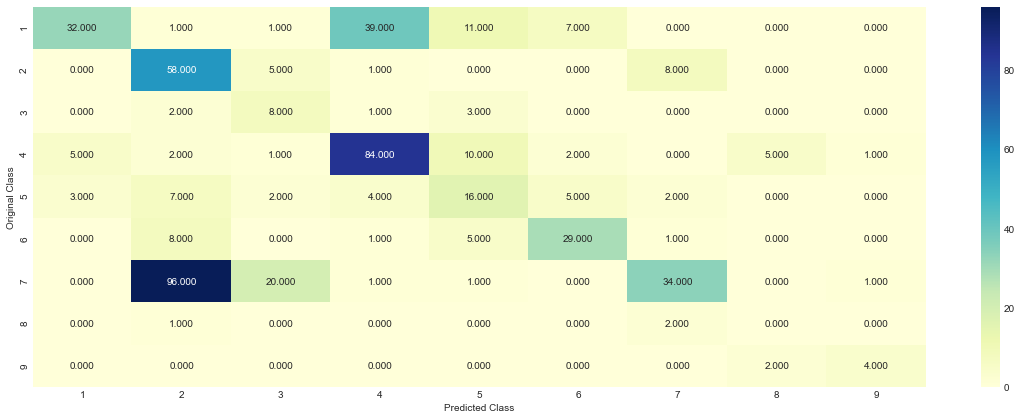

-------------------- Precision matrix (Columm Sum=1) --------------------


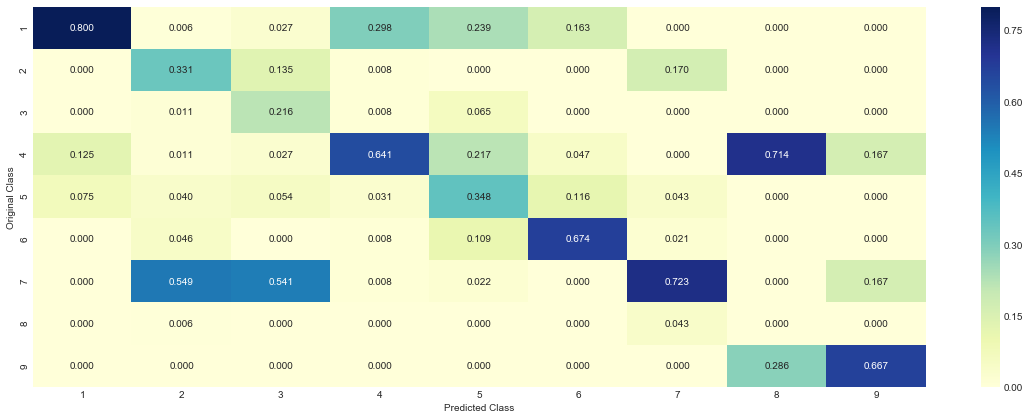

-------------------- Recall matrix (Row sum=1) --------------------


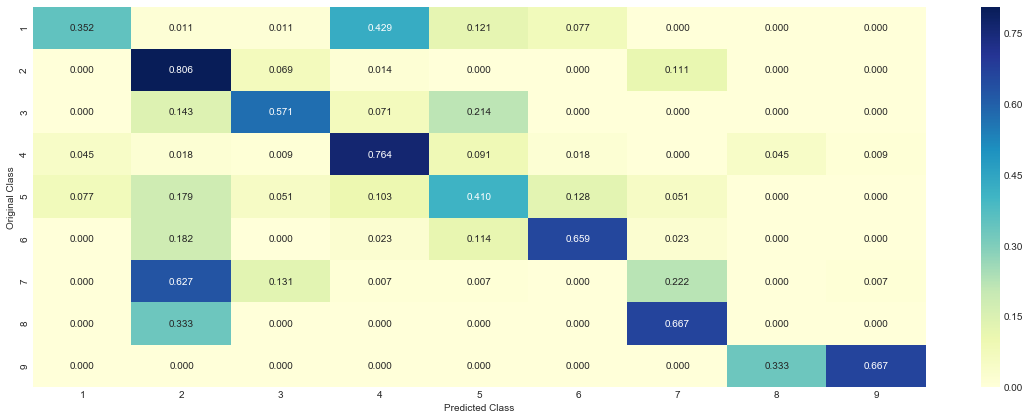

In [100]:


clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [101]:
test_point_index = 79
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])

Predicted Class : 3
Predicted Class Probabilities: [[ 0.0094  0.2522  0.4426  0.011   0.0512  0.0213  0.1916  0.0108  0.0101]]
Actual Class : 3


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [102]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])


Predicted Class : 4
Predicted Class Probabilities: [[ 0.1177  0.0213  0.1506  0.5904  0.0252  0.0366  0.008   0.0201  0.03  ]]
Actual Class : 4


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [103]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.03
Support vector machines : Log Loss: 1.75
Naive Bayes : Log Loss: 1.18
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.177
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.023
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.453
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.049
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.110
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.348


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.686700948122
Log loss (CV) on the stacking classifier : 1.04883137557
Log loss (test) on the stacking classifier : 1.10852229223
Number of missclassified point : 0.3593984962406015
-------------------- Confusion matrix --------------------


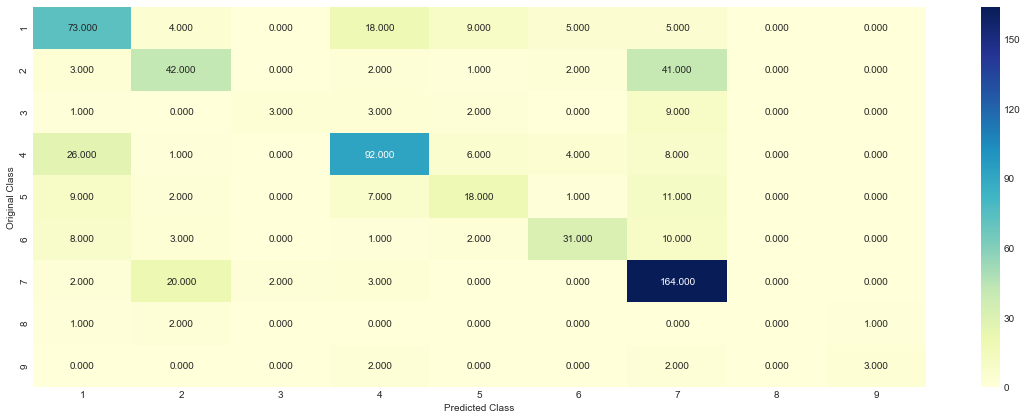

-------------------- Precision matrix (Columm Sum=1) --------------------


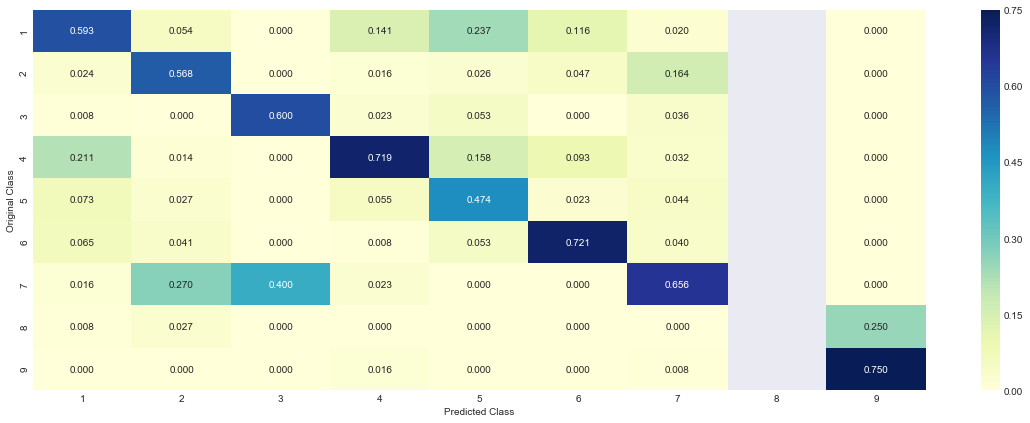

-------------------- Recall matrix (Row sum=1) --------------------


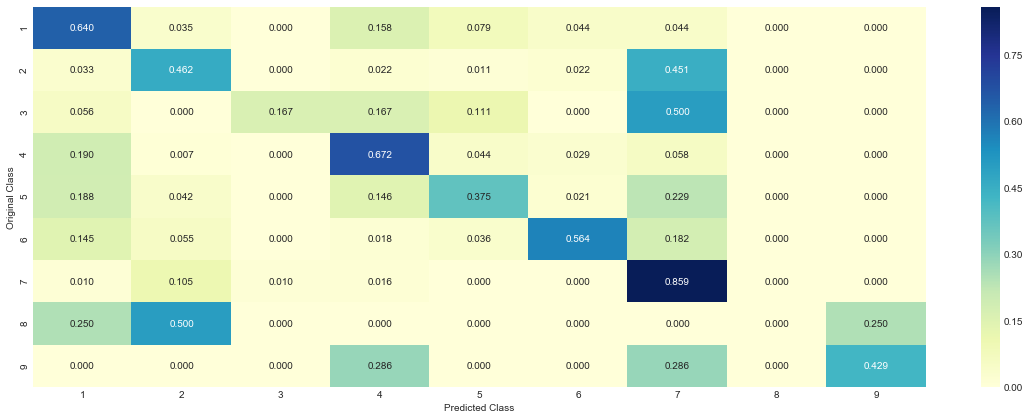

In [104]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.876008217865
Log loss (CV) on the VotingClassifier : 1.12264067848
Log loss (test) on the VotingClassifier : 1.15210396643
Number of missclassified point : 0.36390977443609024
-------------------- Confusion matrix --------------------


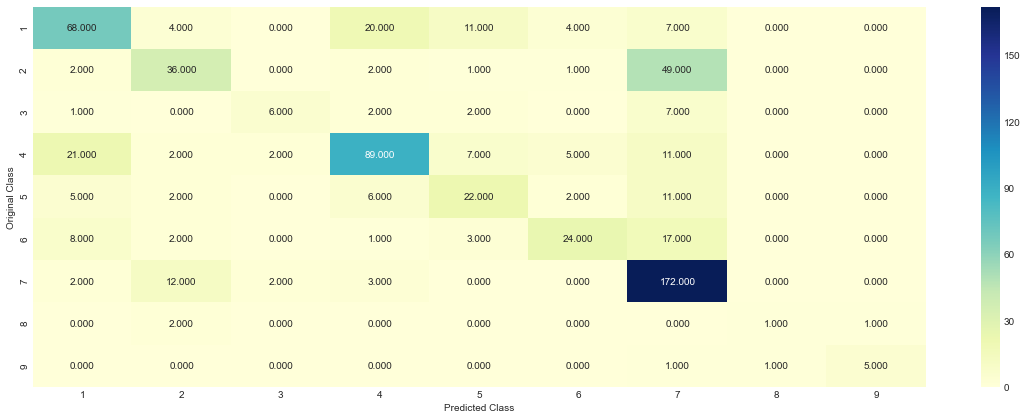

-------------------- Precision matrix (Columm Sum=1) --------------------


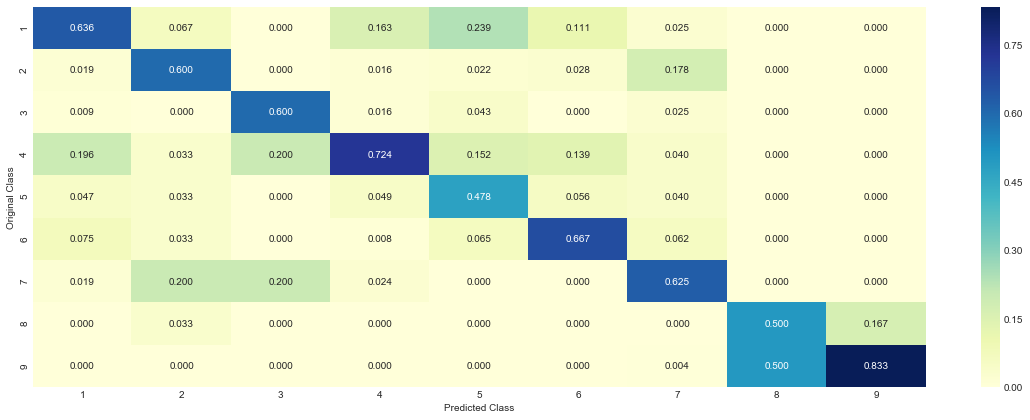

-------------------- Recall matrix (Row sum=1) --------------------


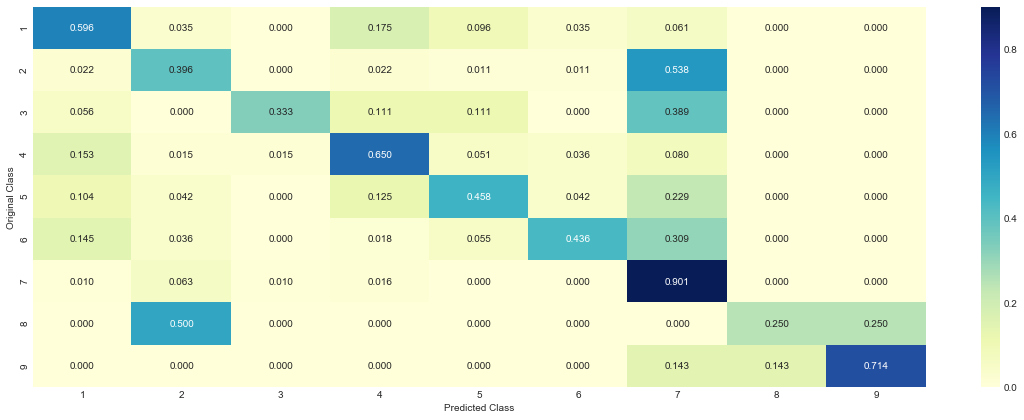

In [105]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>

# Implementing BAG of words and TFIDF vectorizer

We will use two vectorizers for information retrieval and will be using Logistic regression for both of them to get the desired output.The feature engineering part we will perform for TFIDF features

## 1.1 BAG OF WORDS 

we will implement Countvectorizer with uni grams and bi grams both for all the three features

In [138]:
def bag_of_words_with_ngrams(train,cv,test):
    vect = CountVectorizer(ngram_range = (1,2))#using both unigrams and bi grams
    vect.fit(train)
    df_train = vect.transform(train)#training data
    df_cv = vect.transform(cv)#cross vallidation data
    df_test = vect.transform(test)#test data 
    print('After vectorization:\n')
    print('Shape of training data is',df_train.shape)
    print('Shape of cross validation data is',df_cv.shape)
    print('Shape of test data is ',df_test.shape)
    
    return vect,df_train,df_cv,df_test

In [135]:
"""GENE features"""
vect_gene,train_gene_lr,cv_gene_lr,test_gene_lr = bag_of_words_with_ngrams(train_df['Gene'],cv_df['Gene'],test_df['Gene'])

After vectorization:

Shape of training data is (2124, 233)
Shape of cross validation data is (532, 233)
Shape of test data is  (665, 233)


In [139]:
"""Variation Features"""
vect_var,train_var_lr,cv_var_lr,test_var_lr = bag_of_words_with_ngrams(train_df['Variation'],cv_df['Variation'],test_df['Variation'])

After vectorization:

Shape of training data is (2124, 2064)
Shape of cross validation data is (532, 2064)
Shape of test data is  (665, 2064)


In [140]:
"""TEXT features"""
vect_text,train_text_lr,cv_text_lr,test_text_lr = bag_of_words_with_ngrams(train_df['TEXT'],cv_df['TEXT'],test_df['TEXT'])                                                                                                 

After vectorization:

Shape of training data is (2124, 2333597)
Shape of cross validation data is (532, 2333597)
Shape of test data is  (665, 2333597)


In [141]:
#stacking all the three
train_lr = hstack((train_gene_lr,train_var_lr))#training data
train_lr = hstack((train_lr,train_text_lr))

cv_lr = hstack((cv_gene_lr,cv_var_lr))#cross validation data
cv_lr = hstack((cv_lr,cv_text_lr))


test_lr = hstack((test_gene_lr,test_var_lr))#test_data
test_lr = hstack((test_lr,test_text_lr))

In [142]:
print('Final training data shape: ',train_lr.shape)
print('Final Cross validation data shape: ',cv_lr.shape)
print('Final Test data shape: ',test_lr.shape)

Final training data shape:  (2124, 2335894)
Final Cross validation data shape:  (532, 2335894)
Final Test data shape:  (665, 2335894)


## 1.1.1Applying Logistic regression 

In [143]:
#Standardizing the data

from sklearn.preprocessing import StandardScaler


train_std = StandardScaler(with_mean = False).fit_transform(train_lr)
cv_std = StandardScaler(with_mean = False).fit_transform(cv_lr)
test_std = StandardScaler(with_mean = False).fit_transform(test_lr)

For alpha = 1e-05 log loss is 1.8304997567764278
For alpha = 0.0001 log loss is 1.765169473206077
For alpha = 0.001 log loss is 1.679901423330981
For alpha = 0.01 log loss is 1.6336750574988006
For alpha = 0.1 log loss is 1.6312021419540457
For alpha = 1 log loss is 1.6192695823006227
For alpha = 10 log loss is 1.4303438879568233
For alpha = 100 log loss is 1.215508834241224
For alpha = 1000 log loss is 1.258143824939586
For alpha = 10000 log loss is 1.3698923212832494
For alpha = 100000 log loss is 1.4093076918831648


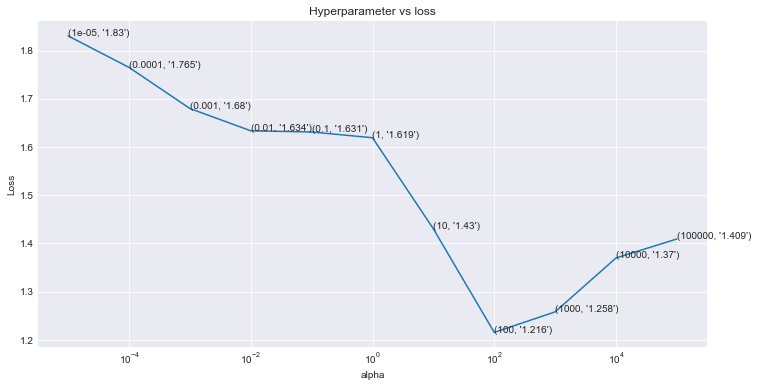

In [144]:

alpha = [10**i for i in range(-5,6)]


#we will plot the probabilties to check how much deviation is there from sigmoid function 
#we are doin this to check for using platt or sigmoid scaling
arr_log_loss = []

for i in alpha:
    clf = SGDClassifier(alpha = i,class_weight = 'balanced',loss = 'log',penalty = 'l2',random_state = 42)
    clf.fit(train_std,y_train)
    clb_clf = CalibratedClassifierCV(clf,method = 'sigmoid')
    clb_clf.fit(train_std,y_train)
    cv_pred = clb_clf.predict_proba(cv_std)
    arr_log_loss.append(log_loss(y_cv,cv_pred,labels = clf.classes_,eps  = 1e-15))
    print('For alpha = {} log loss is {}'.format(i,log_loss(y_cv,cv_pred)))
    



plt.figure(figsize = (12,6))
plt.plot(alpha,arr_log_loss)
plt.xscale('log')
plt.ylabel('Loss')
plt.xlabel('alpha')
plt.title('Hyperparameter vs loss')
for i, txt in enumerate(np.round(arr_log_loss,3)):
    plt.annotate((alpha[i],str(txt)), (alpha[i],arr_log_loss[i]))

In [145]:
best_alpha = alpha[np.argmin(arr_log_loss)]
best_lr = SGDClassifier(alpha = best_alpha,class_weight = 'balanced',penalty = 'l2',loss = 'log',random_state = 42)
best_lr.fit(train_std,y_train)
best_clb = CalibratedClassifierCV(best_lr,method = 'sigmoid')
best_clb.fit(train_std,y_train)


#====================================================================

train_pred = best_clb.predict_proba(train_std)
cv_pred = best_clb.predict_proba(cv_std)
test_pred = best_clb.predict_proba(test_std)
print('Loss on training data is',log_loss(y_train,train_pred,labels = best_lr.classes_))
print('Loss on cross validation data is',log_loss(y_cv,cv_pred,labels = best_lr.classes_))
print('loss on test data is',log_loss(y_test,test_pred,labels = best_lr.classes_))


Loss on training data is 0.652231182657
Loss on cross validation data is 1.21550883424
loss on test data is 1.26895072929


percentage of missclassified points are 43.15789473684211
-------------------- Confusion matrix --------------------


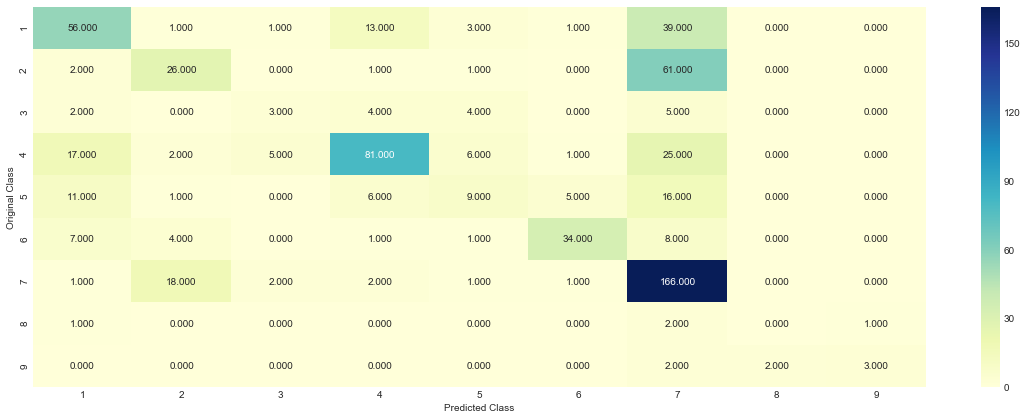

-------------------- Precision matrix (Columm Sum=1) --------------------


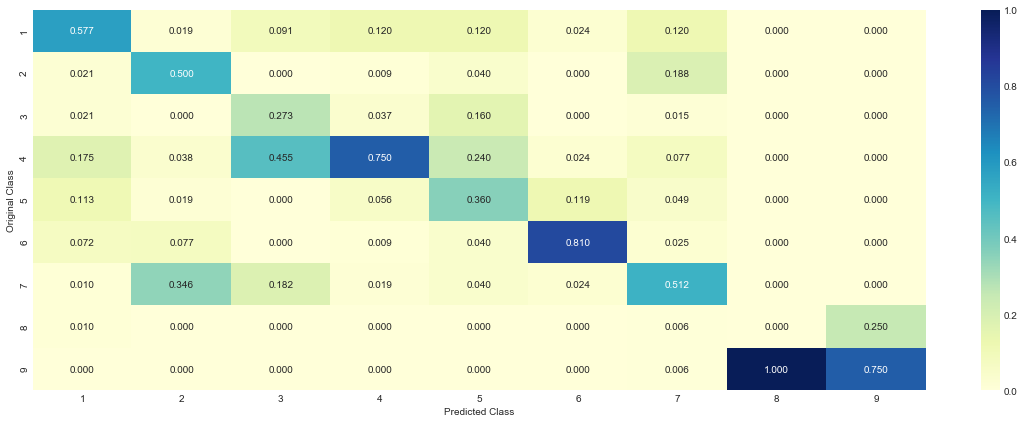

-------------------- Recall matrix (Row sum=1) --------------------


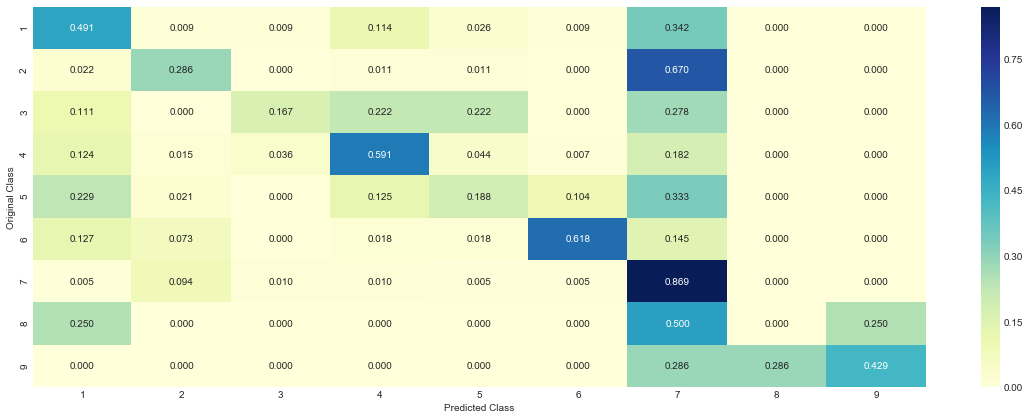

In [146]:
#percentage of missclassified points

pred = best_clb.predict(test_std)
n_miss = np.count_nonzero(y_test-pred)/len(y_test)#ratio of missclassified points 

print('percentage of missclassified points are',n_miss*100)

#plotting the confusion matrix
plot_confusion_matrix(y_test,pred)

In [147]:
gene_fea = vect_gene.get_feature_names()
var_fea = vect_var.get_feature_names()
text_fea = vect_text.get_feature_names()

all_feats = gene_fea + var_fea + text_fea

In [148]:
#finding for a sample query point

gene_fea = vect_gene.get_feature_names()
var_fea = vect_var.get_feature_names()
text_fea = vect_text.get_feature_names()

all_feats = gene_fea + var_fea + text_fea
index = 7
gene = test_df['Gene'].iloc[index]
variation = test_df['Variation'].iloc[index]
Text = test_df['TEXT'].iloc[index]


print('Gene of sample query point:',gene)
print("======================================\n")
print('Variation of sample query point:',variation)
print('===========================================\n')
print('Text of sample query point: ',Text)


print('Actual class is:',y_test[index])
print('\nPredicted Class is ',pred[index])

print('Predicted Probabilities of query point for each class is',best_clb.predict_proba(test_std[index]))



#now we will find most important features for class 4 and class 7 and see how many of them match up
weights = best_lr.coef_
w4 = weights[3]#weight coefficients for class 4
w7 = weights[6]#weight coefficients for class 7

indices_4 = np.argsort(-w4)
indices_7 = np.argsort(-w7)

print('top text features for class 4 are :')
for i in indices_4[:20]:
    print(text_fea[i])
    
#=============================================


print('===================================================')
print('\ntop text features for class 7 are :')
for i in indices_7[:20]:
    print(text_fea[i])

Gene of sample query point: VHL

Variation of sample query point: R167W

Text of sample query point:  von hippel lindau vhl disease hereditary tumor disorder caused mutations deletions vhl gene studies documented clinical phenotype genetic basis occurrence vhl disease china study armed present clinical genetic analyses vhl within five generation vhl family northwestern china summarize vhl mutations clinical characteristics chinese families vhl according previous studies methods epidemiological investigation family members done collect general information retrospective study clinical vhl cases launched collect relative clinical data genetic linkage haplotype analysis used make sure linkage vhl disease family vhl gene screening performed directly analyzing dna sequence output last summarized vhl gene mutation china literature review results five generation north western chinese family afflicted vhl disease traced research family consisted 38 living family members nine affected individual

In [149]:
print('Actual class is:',y_test[index])
print('\nPredicted Class is ',pred[index])

print('Predicted Probabilities of query point for each class is',best_clb.predict_proba(test_std[index]))

Actual class is: 4

Predicted Class is  7
Predicted Probabilities of query point for each class is [[ 0.20115451  0.13567747  0.01405652  0.25164833  0.04904006  0.03175218
   0.30015549  0.00859746  0.00791798]]


In [157]:
#now we will find most important features for class 4 and class 7 and see how many of them match up
weights = best_lr.coef_
w4 = weights[3]#weight coefficients for class 4
w7 = weights[6]#weight coefficients for class 7

indices_4 = np.argsort(-w4)
indices_7 = np.argsort(-w7)

print('top text features for class 4 are :')
for i in indices_4[:20]:
    print(text_fea[i])
    
#=============================================


print('===================================================')
print('\ntop text features for class 7 are :')
for i in indices_7[:20]:
    print(text_fea[i])

top text features for class 4 are :
constructing
00 probably
deduced allele
introduce equivalents
constructed t3
showed superior
assembly algorithms
construction docking
ptps important
produce cells
ptt cell
mutation 103g
proteins establishing
published expression
wnt stimulation
public interest
tumors bax
mixtures replaced
breakage used
public mlh1

top text features for class 7 are :
tumours billerey
yielding 1451
none target
inhibitor nilotinib
targets regulate
lerman
acts adaptator
group 54
labeled spectrum
residues leu114
t681i well
treatment tae684
amc active
18s ribosomal
integration somatic
tables s4
tumours allelic
minor abnormal
nf pi3k
tcc cgg


# TFIDF 

### The feature engineering part :

   - We will use tfidfvectorizer with uni,bi,tri and four grams for text feature,limitting ourselves to to 10000 features 
   - We will use simple Tfidf Vectorizer with uni grams for both gene and variation features
   - Then we will use Logistic Regression with class weights balanced on the data 

In [78]:

gene_tfidf = TfidfVectorizer()#unigrmas for gene feature
train_gene = gene_tfidf.fit_transform(train_df['Gene'])
test_gene = gene_tfidf.transform(test_df['Gene'])
cv_gene = gene_tfidf.transform(cv_df['Gene'])


var_tfidf = TfidfVectorizer()#unigrams for variation feature
train_var = var_tfidf.fit_transform(train_df['Variation'])
test_var = var_tfidf.transform(test_df['Variation'])
cv_var = var_tfidf.transform(cv_df['Variation'])


text_tfidf = TfidfVectorizer(ngram_range = (1,4),max_features = 10000,min_df = 3,stop_words = 'english')#uni,bi,tri and
#fourgrams for text with top 10000 features
train_text = text_tfidf.fit_transform(train_df['TEXT'])
test_text = text_tfidf.transform(test_df['TEXT'])
cv_text = text_tfidf.transform(cv_df['TEXT'])

In [79]:
#stacking all the three
train_lr = hstack((train_gene,train_var))#training data
train_tfidf = hstack((train_lr,train_text))
#train_tfidf = hstack((train_tfidf,t_text))

cv_lr = hstack((cv_gene,cv_var))#cross validation data
cv_tfidf = hstack((cv_lr,cv_text))
#cv_tfidf = hstack((cv_tfidf,c_text))


test_lr = hstack((test_gene,test_var))#test_data
test_tfidf = hstack((test_lr,test_text))

In [80]:
print(train_tfidf.shape)
print(test_tfidf.shape)
print(cv_tfidf.shape)

(2124, 12200)
(665, 12200)
(532, 12200)


For alpha = 1e-05 log loss is 1.0731082675373824
For alpha = 0.0001 log loss is 0.9763382540025684
For alpha = 0.001 log loss is 1.027956923977262
For alpha = 0.01 log loss is 1.2085686276831349
For alpha = 0.1 log loss is 1.426692178153838
For alpha = 1 log loss is 1.506085935735164
For alpha = 10 log loss is 1.5185379197049238
For alpha = 100 log loss is 1.5200360117351988
For alpha = 1000 log loss is 1.5202712405800236
For alpha = 10000 log loss is 1.5251472104835748
For alpha = 100000 log loss is 1.6707626782999556


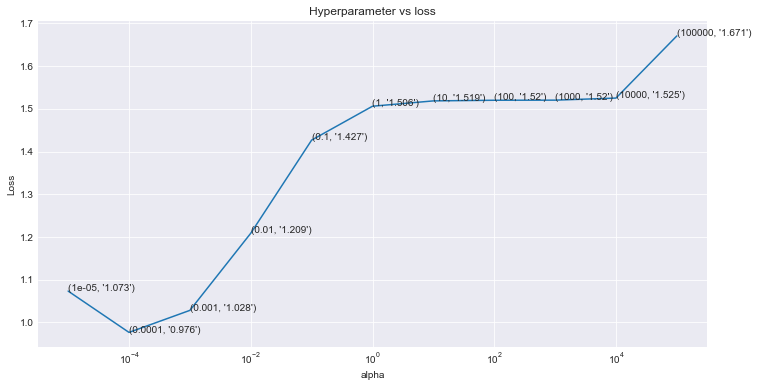

In [81]:
#we are not standardizing the data here
alpha = [10**i for i in range(-5,6)]


#we will plot the probabilties to check how much deviation is there from sigmoid function 
#we are doin this to check for using platt or sigmoid scaling
arr_log_loss = []

for i in alpha:
    clf = SGDClassifier(class_weight = 'balanced',alpha = i,loss = 'log',penalty = 'l2',random_state = 42)
    clf.fit(train_tfidf,y_train)
    clb_clf = CalibratedClassifierCV(clf,method = 'sigmoid')
    clb_clf.fit(train_tfidf,y_train)
    cv_pred = clb_clf.predict_proba(cv_tfidf)
    arr_log_loss.append(log_loss(y_cv,cv_pred,labels = clf.classes_,eps  = 1e-15))
    print('For alpha = {} log loss is {}'.format(i,log_loss(y_cv,cv_pred)))
    



plt.figure(figsize = (12,6))
plt.plot(alpha,arr_log_loss)
plt.xscale('log')
plt.ylabel('Loss')
plt.xlabel('alpha')
plt.title('Hyperparameter vs loss')
for i, txt in enumerate(np.round(arr_log_loss,3)):
    plt.annotate((alpha[i],str(txt)), (alpha[i],arr_log_loss[i]))

In [84]:
best_alpha = alpha[np.argmin(arr_log_loss)]#best value of the hyperparameter
best_lr = SGDClassifier(alpha = best_alpha,class_weight = 'balanced',penalty = 'l2',loss = 'log',random_state = 42)
#using class weights balanced
best_lr.fit(train_tfidf,y_train)
best_clb = CalibratedClassifierCV(best_lr,method = 'sigmoid')
best_clb.fit(train_tfidf,y_train)


#====================================================================

train_pred = best_clb.predict_proba(train_tfidf)
cv_pred = best_clb.predict_proba(cv_tfidf)
test_pred = best_clb.predict_proba(test_tfidf)
print('Loss on training data is',log_loss(y_train,train_pred,labels = best_lr.classes_))
print('Loss on cross validation data is',log_loss(y_cv,cv_pred,labels = best_lr.classes_))
print('loss on test data is',log_loss(y_test,test_pred,labels = best_lr.classes_))


Loss on training data is 0.427072307276
Loss on cross validation data is 0.976338254003
loss on test data is 0.933021090215


percentage of missclassified points are 30.977443609022558
-------------------- Confusion matrix --------------------


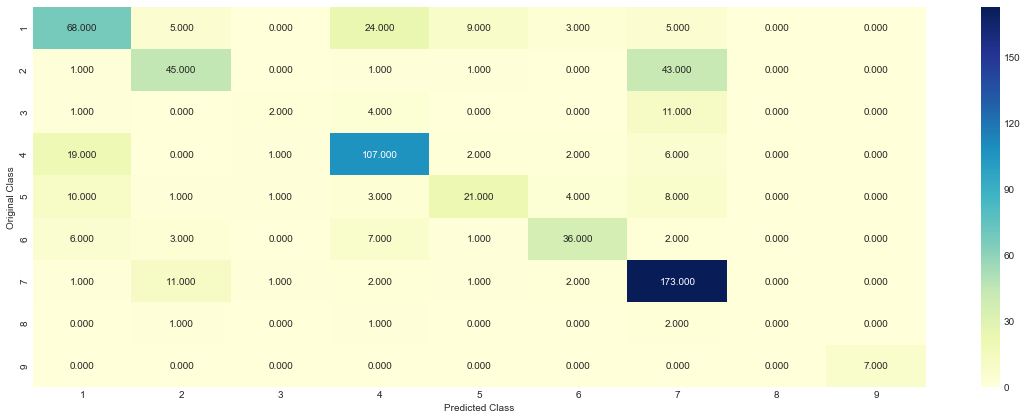

-------------------- Precision matrix (Columm Sum=1) --------------------


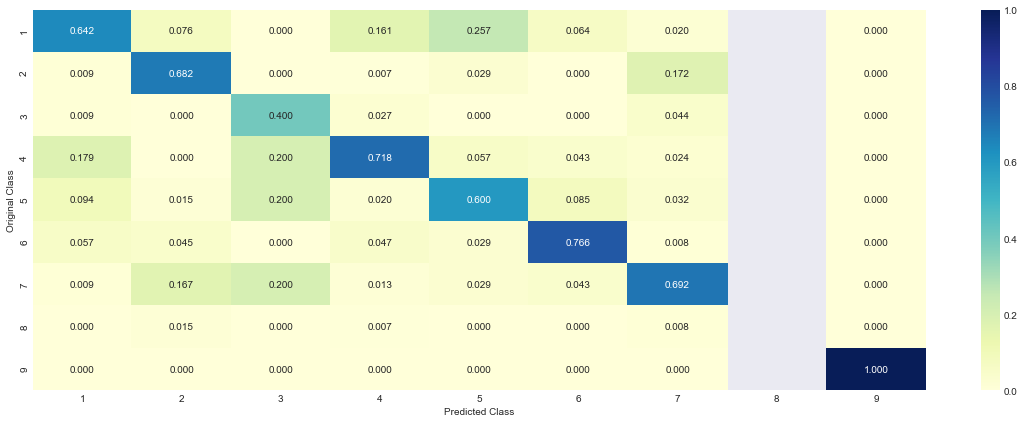

-------------------- Recall matrix (Row sum=1) --------------------


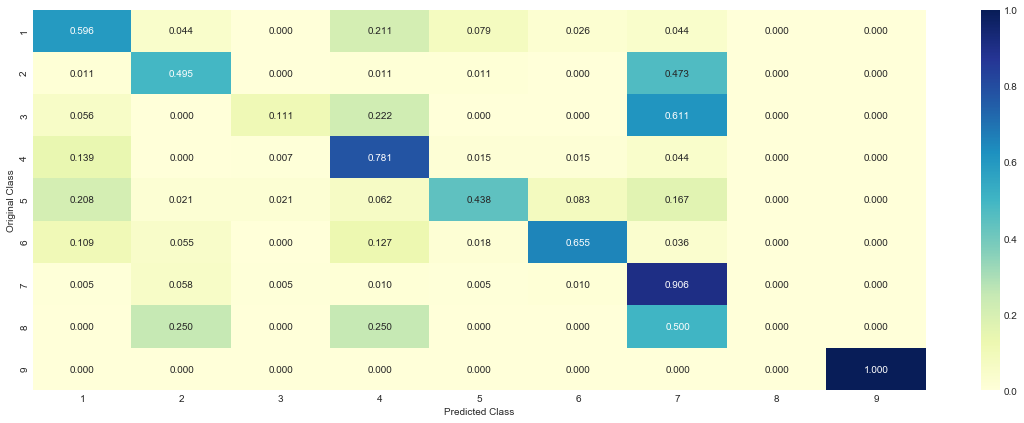

In [85]:
#percentage of missclassified points

pred = best_clb.predict(test_tfidf)
n_miss = np.count_nonzero(y_test-pred)/len(y_test)#ratio of missclassified points 
print('percentage of missclassified points are',n_miss*100)

#plotting the confusion matrix
plot_confusion_matrix(y_test,pred)

In [91]:
#finding for a sample query point

gene_fea = gene_tfidf.get_feature_names()
var_fea = var_tfidf.get_feature_names()
text_fea = text_tfidf.get_feature_names()

all_feats = gene_fea + var_fea + text_fea
index = 7
gene = test_df['Gene'].iloc[index]
variation = test_df['Variation'].iloc[index]
Text = test_df['TEXT'].iloc[index]


print('Gene of sample query point:',gene)
print("======================================\n")
print('Variation of sample query point:',variation)
print('===========================================\n')
print('Text of sample query point: ',Text[:100],'...........................')


print('Actual class is:',y_test[index])
print('\nPredicted Class is ',pred[index])
#print('Predicted Probabilities of query point for each class is',best_clb.predict_proba(test_tfidf[index]))


Gene of sample query point: EGFR

Variation of sample query point: G810S

Text of sample query point:  purpose epidermal growth factor receptor egfr mutations non small cell lung cancer nsclc might predi ...........................
Actual class is: 7

Predicted Class is  7


# Methodology


- Clearly defining the business objective and deciding the right metric for the project is half work done,so we clearly laid out the norms of given problem and how to formulate a machine learning problem from it.


- <font color = 'red'>Univariate analysis and Baseline modelling  is performed on each of the three features:
    
    - <font color = 'black'> missing values are checked in the dataset and text preprocessing is performed on the text data.
    - Dominant classes are checked in the dataset for understanding the class imbalance.
    - We have used Tfidf Vectorization with trigrams,limitting to top 10000 features on the text data.
    - Logistic regression is used as our baseline model to see how well as individual features,are they able to predict the classes.
    - Stability of the feature is checked by understanding the distribution of training cross validation and test data.
    

- <font color = 'blue'>Featurization of data:
    - <font color = 'black'> We performed featurization of data using two approaches:
        - One hot Encoding: Countvectorizer and TfidefVectorizer are used for one hot encoding.Features of this featurization were used to train models which perform better with high dimensional data
        - Response Coding : we also performed response coding where probability values of a gene,variation or word
            belonging to a particular class is used as features.Then features were used to train models which perfoerm better on low dimensional data and 
    
    
- <font color = 'green' > Modelling:
    - <font color = 'black'> We perfomed Modelling on data using following Algorithms:
        - Naive Bayes : trained using one hot Coding features
        - Logistic Regression : trained using one hot coding features(we also trained LR model using features generated from bag of words featurization with bigrmas and uni grams)
        - KNN : trained using response coding features
        - Linear SVM : trained using one hot coding features
        - Random Forest : trained using both reponse coding and one hot coding
    
    
 
- <font color = 'violet'> Stacking and Maximum voting Classifier :
    - <font color = 'black'>Finally we stacked logistic regression,linear SVM and MultiNomial Naive Bayes were used to build a stacked classifier
    and Voting Classifier was used to give the final output.
    
    
    
    
#### The alternate Feature engineering part

- Using the CountVectorizer with uni grams and bi grams for text,variation and gene data and impleneting a logistic regression model with balanced weights.

- Using TfidfVectorizer for all three of the features.limitting ourseleves to top 10000 features of the text and using uni,bi,tri and four grams along with logistic regression model which has class weights balanced
    
    
            
            

## Note : The most important part was to understand the model interpretability and metric chose and avoiding it to become a black box along with keeping a tab on data leakage for response coding part.

# Conclusion:

In [94]:
from prettytable import PrettyTable


#table for individual feature modelling
table_in = PrettyTable()
Models = ['Logistc Regression','Logistic Regression','Logistic Regression']
feature = ['GENE','Variation','Text']
train_loss = ['1.03','1.06','0.728']
cv_loss = ['1.21','1.7167','1.134']
test_loss = ['1.23','1.7108','1.153']
table_in.add_column('Model',Models)
table_in.add_column('Features',feature)
table_in.add_column('training loss',train_loss)
table_in.add_column('Cross validation loss',cv_loss)
table_in.add_column('Test Loss',test_loss)
print('\t\t\tBaseline Modelling on individual features')
print(table_in)
print('\n\n')


#table for one hot coded features
table_oh = PrettyTable()

Models = ['Naive Bayes','Logistic Regression(class balanced)','Logistic Regession(class imbalanced)','Linear SVM','Random Forest']
train_loss = ['0.788','0.568','0.554','0.5534','0.618']
cv_loss = ['1.23866','1.019','1.09194','1.071216','1.1459']
test_loss = ['1.29216','0.9802','1.07821','1.06076','1.16852']
Percent_miss = ['38.90','32.45','32.33','65.41','36.41']

table_oh.add_column('MODELS',Models)
table_oh.add_column('Training loss',train_loss)
table_oh.add_column('Cross Validation loss',cv_loss)
table_oh.add_column('Test loss',test_loss)
table_oh.add_column('Percentage missclassified points',Percent_miss)
print('\t\t\t\t\t Modelling on one hot coded Features using TfidfVectorizer')
print(table_oh)
print('\n\n')


#table for response coded features
table_rc = PrettyTable()
Models = ['K Nearest Neighbors','Random Forest']
train_loss = ['0.61','0.05']
cv_loss = ['1.054','1.30256']
test_loss = ['1.087','1.30981']
table_rc.add_column('Model',Models)
table_rc.add_column('training loss',train_loss)
table_rc.add_column('Cross validation loss',cv_loss)
table_rc.add_column('Test Loss',test_loss)
print('\t\t\t Modelling on response Coded features')
print(table_rc)
print('\n\n')

#table for coutvectorizer with trigrams
table_cv = PrettyTable()
table_cv.field_names = ['Model','Training loss','Cross validation loss','Test loss','Percentage Misclassified points']
table_cv.add_row(['Logistic Regression','0.652','1.23','1.25','43.15'])
print('\t\t\t CountVectorizer with bi grams')
print(table_cv)
print('\n\n')


#table for coutvectorizer with trigrams
table_tfidf = PrettyTable()
table_tfidf.field_names = ['Model','Training loss','Cross validation loss','Test loss','Percentage Misclassified points']
table_tfidf.add_row(['Logistic Regression(weights balanced)','0.42707','0.9763','0.933021','30.95'])
print('\t\t\t TFidf with fourgrams on text data and top 10000 features')
print(table_tfidf)


			Baseline Modelling on individual features
+---------------------+-----------+---------------+-----------------------+-----------+
|        Model        |  Features | training loss | Cross validation loss | Test Loss |
+---------------------+-----------+---------------+-----------------------+-----------+
|  Logistc Regression |    GENE   |      1.03     |          1.21         |    1.23   |
| Logistic Regression | Variation |      1.06     |         1.7167        |   1.7108  |
| Logistic Regression |    Text   |     0.728     |         1.134         |   1.153   |
+---------------------+-----------+---------------+-----------------------+-----------+



					 Modelling on one hot coded Features using TfidfVectorizer
+--------------------------------------+---------------+-----------------------+-----------+----------------------------------+
|                MODELS                | Training loss | Cross Validation loss | Test loss | Percentage missclassified points |
+---------------

## We find that though Logistic Regression with class balanced gives the least log loss on test data - 0.933 and cross validation loss - 0.976 and percentage of missclassified points are also aroud 30.5 percent which is reasonably good which we achieved using TFIDF vectorization with top 10000 features and ngram_range = (1,4).